In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

sns.set()

In [8]:
### age stratified data FINLAND ###

fin_pop_url = 'https://pxnet2.stat.fi:443/PXWeb/api/v1/sv/StatFin/vrm/vaerak/statfin_vaerak_pxt_11rd.px'
fin_pop_query = {
  "query": [
    {
      "code": "Vuosi",
      "selection": {
        "filter": "item",
        "values": [
          "2015",
          "2016",
          "2017",
          "2018",
          "2019",
          "2020"
        ]
      }
    },
    {
      "code": "Sukupuoli",
      "selection": {
        "filter": "item",
        "values": [
          "SSS"
        ]
      }
    },
    {
      "code": "Ikä",
      "selection": {
        "filter": "agg:1-års åldersgrupp.agg",
        "values": [
          "000",
          "001",
          "002",
          "003",
          "004",
          "005",
          "006",
          "007",
          "008",
          "009",
          "010",
          "011",
          "012",
          "013",
          "014",
          "015",
          "016",
          "017",
          "018",
          "019",
          "020",
          "021",
          "022",
          "023",
          "024",
          "025",
          "026",
          "027",
          "028",
          "029",
          "030",
          "031",
          "032",
          "033",
          "034",
          "035",
          "036",
          "037",
          "038",
          "039",
          "040",
          "041",
          "042",
          "043",
          "044",
          "045",
          "046",
          "047",
          "048",
          "049",
          "050",
          "051",
          "052",
          "053",
          "054",
          "055",
          "056",
          "057",
          "058",
          "059",
          "060",
          "061",
          "062",
          "063",
          "064",
          "065",
          "066",
          "067",
          "068",
          "069",
          "070",
          "071",
          "072",
          "073",
          "074",
          "075",
          "076",
          "077",
          "078",
          "079",
          "080",
          "081",
          "082",
          "083",
          "084",
          "085",
          "086",
          "087",
          "088",
          "089",
          "090",
          "091",
          "092",
          "093",
          "094",
          "095",
          "096",
          "097",
          "098",
          "099",
          "100-"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}


In [9]:
fin_r = requests.post(fin_pop_url,json=fin_pop_query)
fin_r

<Response [200]>

In [10]:
### check data structure ###
fin_r.json()['data'][0]

{'key': ['2015', 'SSS', '000'], 'values': ['55560']}

In [11]:
def parse_json(json_data,param):

    parsed_data = pd.DataFrame.from_dict(json_data)
    parsed_data[['year','foo','age']] = parsed_data['key'].to_list()
    parsed_data.drop(['key','foo'],axis=1,inplace=True)
    parsed_data['age'] = parsed_data['age'].str.lstrip('0').str.rstrip('-')
    parsed_data['age'] = parsed_data['age'].replace('',0)
    parsed_data['age'] = parsed_data['age'].astype(int)
    parsed_data[param] = parsed_data['values'].apply(lambda x : x[0])
    parsed_data.drop('values',axis=1,inplace=True)
    parsed_data[param] = parsed_data[param].astype(int)
    parsed_data.set_index(['year','age'],inplace=True)
    return parsed_data

In [12]:
fin_age_pop = parse_json(fin_r.json()['data'],'pop')
fin_age_pop

pop
year age       
2015 0    55560
     1    58008
     2    59050
     3    60615
     4    61145
...         ...
2020 96    2670
     97    1876
     98    1182
     99     752
     100   1038

[606 rows x 1 columns]

In [13]:
### sanity check ###
fin_age_pop.groupby('year').sum()

,pop
year,
2015,5487308
2016,5503297
2017,5513130
2018,5517919
2019,5525292
2020,5533793


In [14]:
### fin dead ###

fin_dead_url = 'https://pxnet2.stat.fi:443/PXWeb/api/v1/sv/StatFin/vrm/kuol/statfin_kuol_pxt_12ag.px'
fin_dead_query = {
  "query": [
    {
      "code": "Vuosi",
      "selection": {
        "filter": "item",
        "values": [
          "2015",
          "2016",
          "2017",
          "2018",
          "2019",
          "2020"
        ]
      }
    },
    {
      "code": "Sukupuoli",
      "selection": {
        "filter": "item",
        "values": [
          "SSS"
        ]
      }
    },
    {
      "code": "Ikä",
      "selection": {
        "filter": "agg:1-års åldersgrupp.agg",
        "values": [
          "000",
          "001",
          "002",
          "003",
          "004",
          "005",
          "006",
          "007",
          "008",
          "009",
          "010",
          "011",
          "012",
          "013",
          "014",
          "015",
          "016",
          "017",
          "018",
          "019",
          "020",
          "021",
          "022",
          "023",
          "024",
          "025",
          "026",
          "027",
          "028",
          "029",
          "030",
          "031",
          "032",
          "033",
          "034",
          "035",
          "036",
          "037",
          "038",
          "039",
          "040",
          "041",
          "042",
          "043",
          "044",
          "045",
          "046",
          "047",
          "048",
          "049",
          "050",
          "051",
          "052",
          "053",
          "054",
          "055",
          "056",
          "057",
          "058",
          "059",
          "060",
          "061",
          "062",
          "063",
          "064",
          "065",
          "066",
          "067",
          "068",
          "069",
          "070",
          "071",
          "072",
          "073",
          "074",
          "075",
          "076",
          "077",
          "078",
          "079",
          "080",
          "081",
          "082",
          "083",
          "084",
          "085",
          "086",
          "087",
          "088",
          "089",
          "090",
          "091",
          "092",
          "093",
          "094",
          "095",
          "096",
          "097",
          "098",
          "099",
          "100-"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }}

In [15]:
fin_r_dead = requests.post(fin_dead_url,json=fin_dead_query)
fin_r_dead

<Response [200]>

In [16]:
fin_age_dead = parse_json(fin_r_dead.json()['data'],'dead')
fin_age_dead

dead
year age      
2015 0      97
     1       6
     2       8
     3       5
     4       4
...        ...
2020 96    873
     97    616
     98    433
     99    301
     100   452

[606 rows x 1 columns]

In [17]:
### sanity check ###
fin_age_dead.groupby('year').sum()

,dead
year,
2015,52492
2016,53923
2017,53722
2018,54527
2019,53949
2020,55488


In [18]:
fin_age_mortality = fin_age_dead['dead'] / fin_age_pop['pop']
fin_age_mortality

year  age
2015  0      0.001746
      1      0.000103
      2      0.000135
      3      0.000082
      4      0.000065
               ...   
2020  96     0.326966
      97     0.328358
      98     0.366328
      99     0.400266
      100    0.435453
Length: 606, dtype: float64

In [19]:
fin_age_baseline = fin_age_mortality.loc['2015' : '2018']
fin_age_baseline = fin_age_baseline.unstack().mean()
fin_age_baseline

age
0      0.001941
1      0.000210
2      0.000128
3      0.000090
4      0.000066
         ...   
96     0.311485
97     0.354375
98     0.379818
99     0.410653
100    0.495031
Length: 101, dtype: float64

In [20]:
fin_age_expectation = fin_age_pop.unstack().droplevel(level=0,axis=1) * fin_age_baseline
fin_age_expectation

age,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
year,,,,,,,,,,,,,,,,,,,,,
2015,107.820895,12.167652,7.562540,5.451004,4.053785,5.323208,4.513498,3.703135,2.935990,4.218359,...,1607.609996,1467.591815,1222.629216,1050.724064,832.360796,526.410013,477.697609,328.542270,224.627106,375.728712
2016,103.153702,11.716253,7.470457,5.334098,4.036216,5.232578,4.553476,3.753947,2.976765,4.218705,...,1730.901193,1483.117675,1333.941869,1075.100456,877.860532,672.185094,411.429469,345.634064,234.072121,403.450462
2017,98.172128,11.230872,7.193314,5.269619,3.952349,5.212457,4.480717,3.792162,3.020680,4.278268,...,1719.286805,1590.007245,1373.534784,1170.066816,935.019576,699.907278,556.723252,302.714669,248.444971,422.756680
2018,92.495812,10.683823,6.892349,5.075913,3.900172,5.104264,4.461382,3.730621,3.050005,4.340183,...,1772.355624,1581.846217,1455.209311,1203.584355,992.462992,735.416593,556.368877,409.823247,219.288619,440.082774
2019,88.775642,10.087271,6.566282,4.866380,3.759289,5.036057,4.367543,3.715492,3.001162,4.383765,...,1910.834867,1633.200982,1447.064483,1291.440935,1033.981501,814.845323,603.500763,423.116865,298.133965,449.488367
2020,90.285445,9.674047,6.196928,4.636254,3.607003,4.858293,4.315862,3.636712,2.989229,4.315486,...,1985.703000,1775.720410,1513.128090,1274.682165,1112.468546,831.665524,664.807652,448.944466,308.810939,513.842429


In [21]:
fin_age_expectation.sum(axis=1)

year
2015    52034.806194
2016    53167.131897
2017    54432.278318
2018    55583.629523
2019    56999.737301
2020    58356.144716
dtype: float64

In [22]:
fin_age_excess = fin_age_dead.unstack().droplevel(level=0,axis=1) - fin_age_expectation
fin_age_excess

age,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
year,,,,,,,,,,,,,,,,,,,,,
2015,-10.820895,-6.167652,0.437460,-0.451004,-0.053785,-0.323208,-3.513498,-0.703135,-0.935990,0.781641,...,50.390004,-69.591815,65.370784,-40.724064,14.639204,-23.410013,-16.697609,1.457730,-12.627106,31.271288
2016,-3.153702,-3.716253,-2.470457,-0.334098,0.963784,6.767422,1.446524,-0.753947,0.023235,0.781295,...,-52.901193,67.882325,-52.941869,63.899544,13.139468,-14.185094,39.570531,14.365936,23.927879,-31.450462
2017,3.827872,5.769128,0.806686,-2.269619,2.047651,-1.212457,0.519283,1.207838,1.979320,0.721732,...,40.713195,-90.007245,28.465216,-78.066816,-46.019576,-8.907278,-45.723252,-3.714669,11.555029,-11.756680
2018,8.504188,3.316177,1.107651,2.924087,-2.900172,-5.104264,1.538618,0.269379,-1.050005,-2.340183,...,-43.355624,92.153783,-50.209311,55.415645,16.537008,57.583407,11.631123,-13.823247,-20.288619,9.917226
2019,7.224358,-3.087271,0.433718,0.133620,0.240711,-0.036057,-2.367543,-2.715492,-1.001162,-1.383765,...,-86.834867,12.799018,-0.064483,-91.440935,-54.981501,-63.845323,-44.500763,0.883135,-43.133965,-41.488367
2020,-7.285445,-4.674047,-0.196928,1.363746,2.392997,-3.858293,-1.315862,0.363288,-2.989229,-0.315486,...,-46.703000,-163.720410,-51.128090,-6.682165,-47.468546,41.334476,-48.807652,-15.944466,-7.810939,-61.842429


In [23]:
fin_age_excess.sum(axis=1)

year
2015     457.193806
2016     755.868103
2017    -710.278318
2018   -1056.629523
2019   -3050.737301
2020   -2868.144716
dtype: float64

In [24]:
### SWE DATA ###

dead_url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101I/DodaHandelseK'
dead_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

pop_url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101A/FolkmangdNov'
pop_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

def get_data(url,query):
    r = requests.post(url,json=query)
    
    if r.status_code != 200 :
        print (r.status_code)
    
    data = pd.DataFrame.from_dict(r.json()['data'])
    data[['area','age','gender','year']] = data['key'].to_list()
    data['count'] = data['values'].apply(lambda x : x[0])
    data['age'] = data['age'].apply(lambda x : x.replace('+','')).astype(int)
    data.drop(['values','key','area'],axis=1,inplace=True)
    data.set_index('year',inplace=True)
    data['count'] = data['count'].astype(int)
    data = data.groupby(['year','age']).sum()
    
    return data
    
dead_df = get_data(dead_url,dead_query)
dead_df.rename(columns={'count' : 'dead'},inplace=True)

pop_df = get_data(pop_url,pop_query)
pop_df.rename(columns={'count' : 'pop'},inplace=True)

In [25]:
def get_swe_gender_data(url,query):
    r = requests.post(url,json=query)
    
    if r.status_code != 200 :
        print (r.status_code)
    
    data = pd.DataFrame.from_dict(r.json()['data'])
    data[['area','age','gender','year']] = data['key'].to_list()
    data['count'] = data['values'].apply(lambda x : x[0])
    data['age'] = data['age'].apply(lambda x : x.replace('+','')).astype(int)
    data.drop(['values','key','area'],axis=1,inplace=True)
    data.set_index('year',inplace=True)
    data['count'] = data['count'].astype(int)
    data = data.groupby(['year','age','gender']).sum()
    
    return data
    
swe_gender_pop = get_swe_gender_data(pop_url,pop_query)
swe_gender_dead = get_swe_gender_data(dead_url,dead_query)

swe_gender_mort = (swe_gender_dead / swe_gender_pop).dropna()

idx = pd.IndexSlice
swe_male_mort = swe_gender_mort.loc[idx[:,:,'1'],:]
swe_female_mort = swe_gender_mort.loc[idx[:,:,'2'],:]
swe_male_mort = swe_male_mort.droplevel(2)
swe_female_mort = swe_female_mort.droplevel(2)

swe_male_mort

count
year age          
2002 0    0.004073
     1    0.000336
     2    0.000380
     3    0.000108
     4    0.000149
...            ...
2021 96   0.327470
     97   0.383920
     98   0.386260
     99   0.458228
     100  0.507277

[2020 rows x 1 columns]

count    0.05368
Name: (2020, 80), dtype: float64
count    0.036445
Name: (2020, 80), dtype: float64


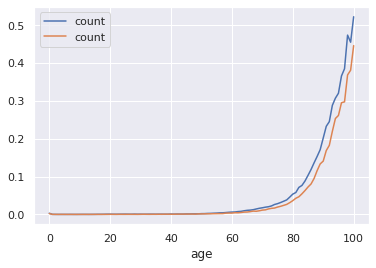

In [26]:
ax=swe_male_mort.loc['2020'].plot()
swe_female_mort.loc['2020'].plot(ax=ax)

print (swe_male_mort.loc['2020',80])
print (swe_female_mort.loc['2020',80])

In [27]:
swe_gender_abs_diff = swe_male_mort - swe_female_mort
print (swe_gender_abs_diff.loc['2020'].idxmax())
print (swe_gender_abs_diff.loc['2020'].max())

count    98
dtype: int64
count    0.10529
dtype: float64


In [28]:
swe_gender_rel_diff = swe_male_mort / swe_female_mort
print (swe_gender_rel_diff.head())
swe_female_mort.loc[swe_female_mort['count'] == 0]

             count
year age          
2002 0    1.158335
     1    1.890243
     2    2.425224
     3    0.955093
     4    2.194058


,,count
year,age,
2006,7,0.0
2008,7,0.0
2012,9,0.0
2015,5,0.0


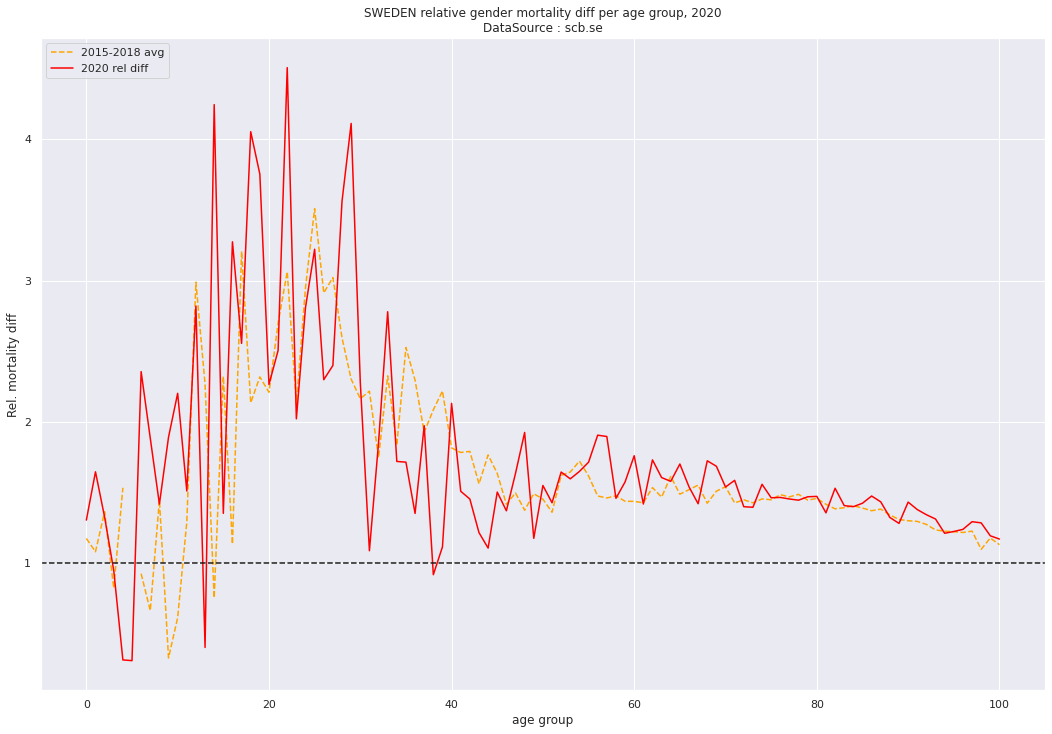

In [29]:
baseline_gender_rel_diff = swe_gender_rel_diff.unstack().droplevel(0,axis=1).loc['2015' : '2018'].mean()

title = 'SWEDEN relative gender mortality diff per age group, 2020\nDataSource : scb.se'
ax = baseline_gender_rel_diff.plot(figsize=(18,12),ls='dashed',color='orange',
                                   label='2015-2018 avg rel diff',title=title)
swe_gender_rel_diff.loc['2020'].plot(ax=ax,color='red')
baseline_gender_rel_diff.sort_values().tail(40)
ax.axhline(1,ls='dashed',color='k')
plt.legend(['2015-2018 avg','2020 rel diff'],loc='upper left')
plt.ylabel('Rel. mortality diff')
plt.xlabel('age group')
plt.savefig('FIN_SWE_rel_gender_diff.jpg',format='jpg')

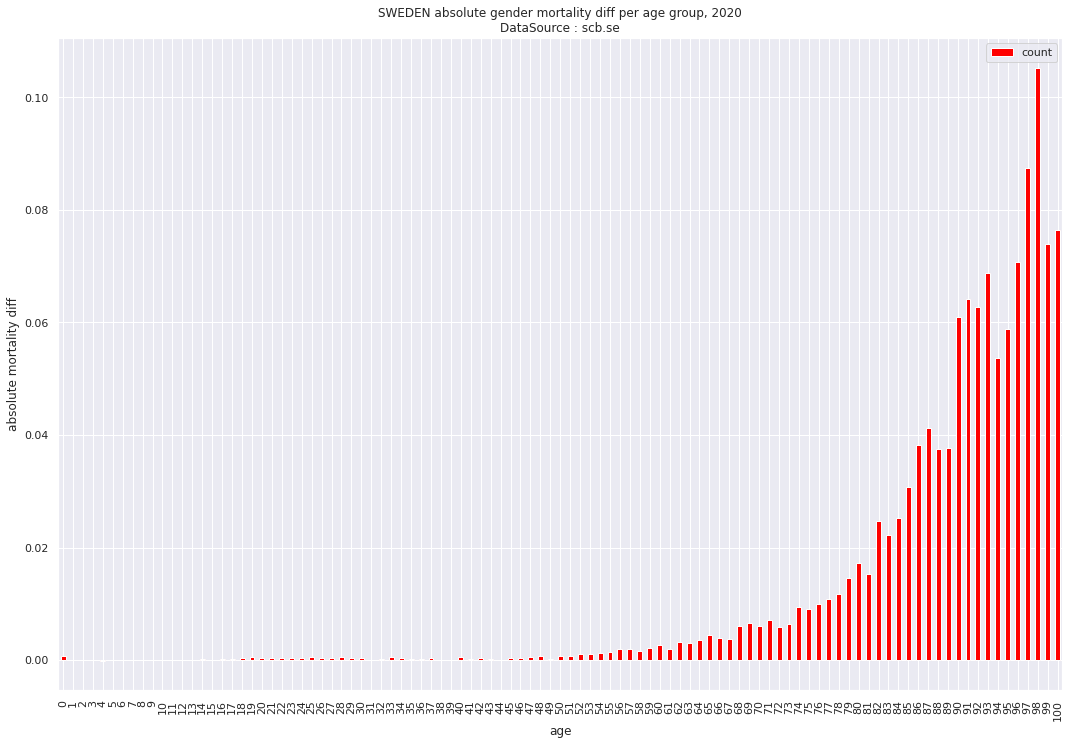

In [30]:
title = 'SWEDEN absolute gender mortality diff per age group, 2020\nDataSource : scb.se'

swe_gender_abs_diff.loc['2020'].plot(kind='bar',figsize=(18,12),color='red',title=title)
plt.ylabel('absolute mortality diff')
plt.savefig('FIN_SWE_abs_gender_diff.jpg',format='jpg')

In [31]:
swe_age_mortality = (dead_df['dead'] / pop_df['pop']).dropna()
swe_age_mortality


year  age
2002  0      0.003801
      1      0.000259
      2      0.000271
      3      0.000111
      4      0.000110
               ...   
2021  96     0.281847
      97     0.294498
      98     0.316786
      99     0.375337
      100    0.421379
Length: 2020, dtype: float64

In [32]:
### cmp mortality FIN vs SWE 2020 ###
fin_swe_age_mort_rel = fin_age_mortality.loc['2020'] / swe_age_mortality.loc['2020']
fin_swe_age_mort_rel

age
0      0.648613
1      0.573869
2      1.233730
3      2.336747
4      1.149120
         ...   
96     1.043404
97     1.026960
98     0.931127
99     1.009894
100    0.948079
Length: 101, dtype: float64

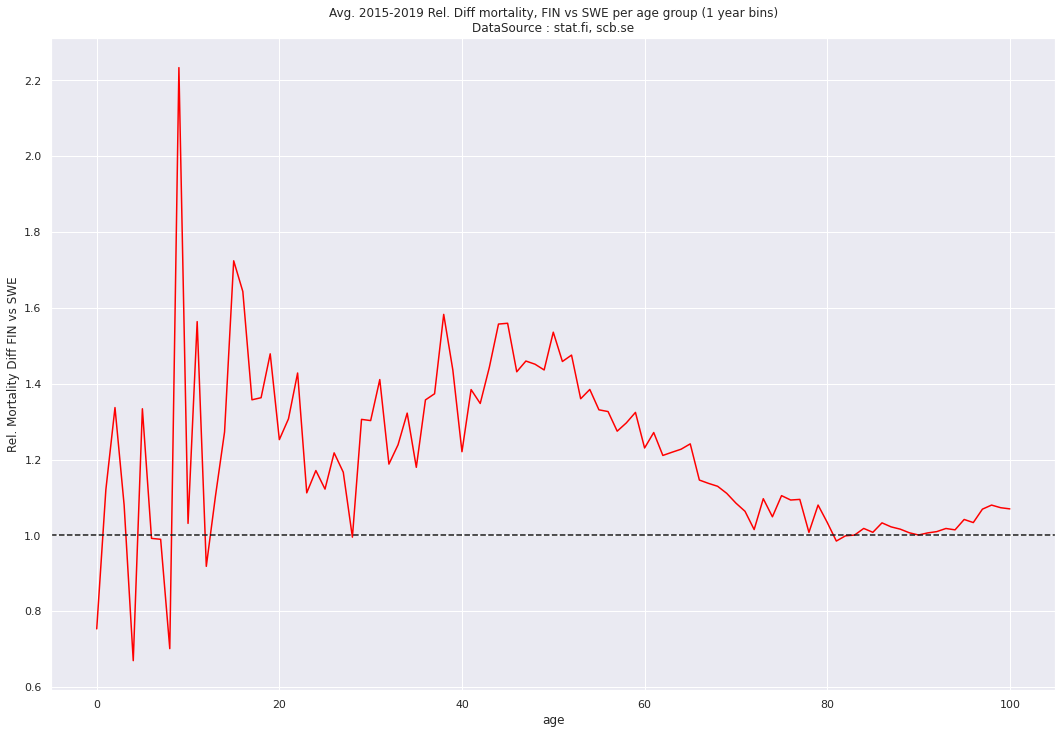

In [33]:
title = 'Avg. 2015-2019 Rel. Diff mortality, FIN vs SWE per age group (1 year bins)\nDataSource : stat.fi, scb.se'

fin_swe_age_mort_rel_all = (fin_age_mortality / swe_age_mortality).dropna()
fin_swe_age_mort_rel_all.unstack().T
ax = fin_swe_age_mort_rel_all.unstack().T.loc[:,'2015' : '2019'].mean(axis=1).plot(figsize=(18,12), color='red',title=title)
ax.axhline(1,ls='dashed',color='k')
ax.set_ylabel('Rel. Mortality Diff FIN vs SWE')
plt.savefig('FIN_SWE_rel_avg_mort.jpg',format='jpg')

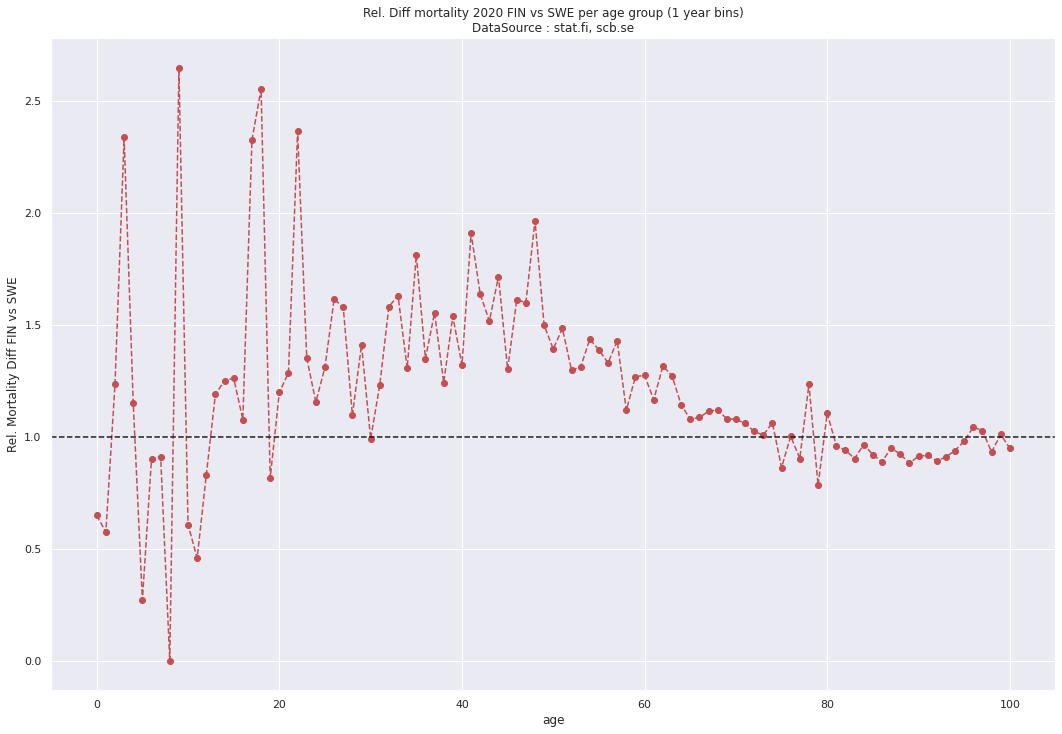

In [34]:
title = 'Rel. Diff mortality 2020 FIN vs SWE per age group (1 year bins)\nDataSource : stat.fi, scb.se'
ax = fin_swe_age_mort_rel.plot(figsize=(18,12),style='ro--',title=title)
ax.axhline(1,ls='dashed',color='k')
ax.set_ylabel('Rel. Mortality Diff FIN vs SWE')
plt.savefig('FIN_SWE_2020_rel_diff.jpg',format='jpg')

In [35]:
pop_df


pop
year age       
2002 0    82336
     1    92580
     2    92138
     3    90251
     4    91214
...         ...
2021 96    5652
     97    4180
     98    2800
     99    1857
     100   2900

[2020 rows x 1 columns]

In [36]:
### for comparing FIN vs. SWE, define standard population based on FIN population 2019 ###
#std_pop = pop_df.loc['2019'] # SWE std pop #
std_pop = fin_age_pop.loc['2019']
std_pop

,pop
age,
0,45746
1,48090
2,51271
3,54114
4,56703
...,...
96,2616
97,1703
98,1114


In [37]:
fin_std_dead = fin_age_mortality * std_pop['pop']
swe_std_dead = swe_age_mortality * std_pop['pop']
swe_std_dead = swe_std_dead.loc['2015' :]

print (fin_std_dead)
print (swe_std_dead)

year  age
2015  0       79.866127
      1        4.974141
      2        6.946113
      3        4.463747
      4        3.709412
                ...    
2020  96     855.343820
      97     559.194030
      98     408.089679
      99     290.593085
      100    395.391137
Length: 606, dtype: float64
year  age
2015  0      130.523008
      1        8.582246
      2        8.333040
      3        3.217597
      4        5.811520
                ...    
2021  96     737.312102
      97     501.529426
      98     352.899286
      99     272.494346
      100    382.612414
Length: 707, dtype: float64


In [38]:
fin_swe_std_dead_age = pd.concat([fin_std_dead,swe_std_dead],axis=1)
fin_swe_std_dead_age.columns = ['FIN','SWE']
fin_swe_std_dead_age

FIN         SWE
year age                       
2015 0    79.866127  130.523008
     1     4.974141    8.582246
     2     6.946113    8.333040
     3     4.463747    3.217597
     4     3.709412    5.811520
...             ...         ...
2021 96         NaN  737.312102
     97         NaN  501.529426
     98         NaN  352.899286
     99         NaN  272.494346
     100        NaN  382.612414

[707 rows x 2 columns]

In [39]:
fin_swe_std_dead_2015_2020 = fin_swe_std_dead_age.groupby('year').sum()

fin_swe_std_dead_2015_2020 = fin_swe_std_dead_2015_2020 / std_pop['pop'].sum()

fin_swe_std_dead_2015_2020

,FIN,SWE
year,,
2015,0.010420,0.009849
2016,0.010503,0.009697
2017,0.010191,0.009669
2018,0.010150,0.009556
2019,0.009764,0.009004
2020,0.009869,0.009805
2021,0.000000,0.009029


In [40]:
age_std_baseline = fin_swe_std_dead_2015_2020.loc['2015' : '2018'].mean()
age_std_baseline

FIN    0.010316
SWE    0.009693
dtype: float64

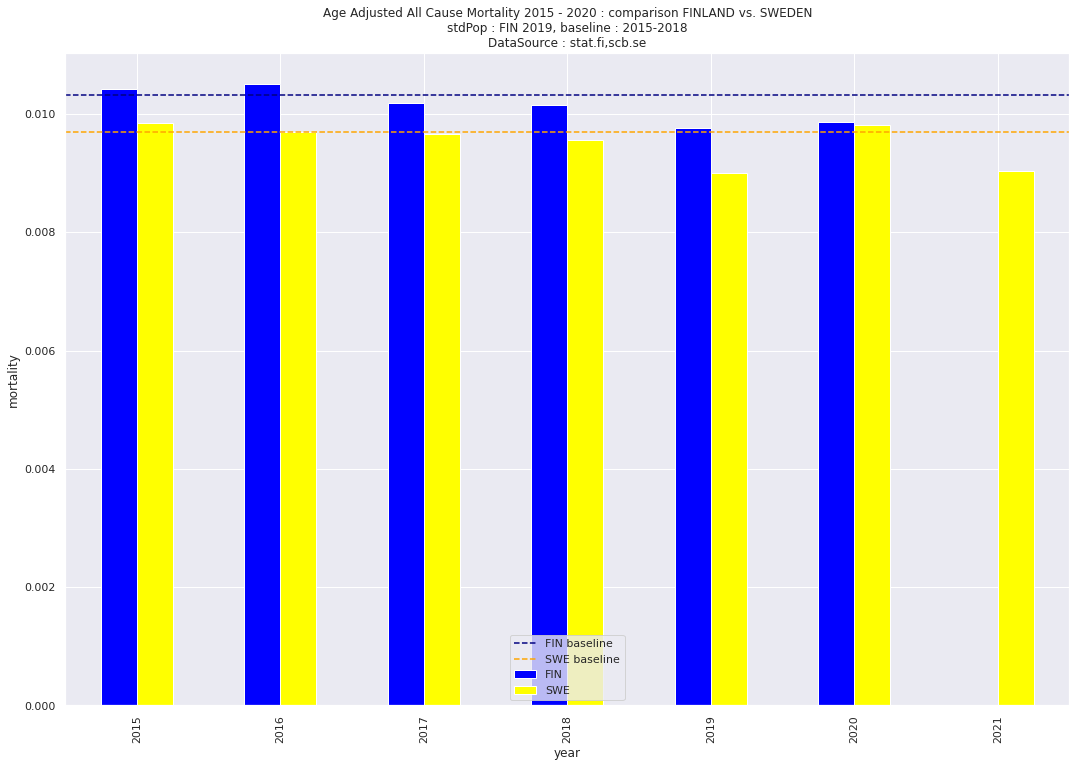

In [41]:
title = 'Age Adjusted All Cause Mortality 2015 - 2020 : comparison FINLAND vs. SWEDEN\nstdPop : FIN 2019, baseline : 2015-2018\nDataSource : stat.fi,scb.se'
ax = fin_swe_std_dead_2015_2020.plot(kind='bar',figsize=(18,12),color=['blue','yellow'],title=title)

ax.axhline(age_std_baseline['FIN'],color='navy',ls='dashed',label='FIN baseline')
ax.axhline(age_std_baseline['SWE'],color='orange',ls='dashed',label='SWE baseline')

ax.legend(loc='lower center')
ax.set_ylabel('mortality')
plt.savefig('FIN_SWE_age_adj_mortality.jpg',format='jpg')

In [42]:
swe_age_mort_baseline = swe_age_mortality.loc['2015' : '2018'].unstack().mean()
swe_age_mort_baseline

age
0      0.002717
1      0.000187
2      0.000131
3      0.000079
4      0.000100
         ...   
96     0.300639
97     0.326506
98     0.352301
99     0.385650
100    0.463904
Length: 101, dtype: float64

In [43]:
swe_expectation = swe_age_mort_baseline * pop_df['pop']
swe_expectation

year  age
2002  0       223.670014
      1        17.348022
      2        12.101813
      3         7.136292
      4         9.113383
                ...     
2021  96     1699.211651
      97     1364.794229
      98      986.441799
      99      716.152645
      100    1345.320608
Length: 2020, dtype: float64

In [44]:
swe_yearly_expectation = (swe_expectation.groupby('year').sum()).loc['2015' :]
swe_yearly_expectation

year
2015    89540.253570
2016    90987.416605
2017    92182.273875
2018    93502.375723
2019    95513.758999
2020    96947.611871
2021    98818.382128
dtype: float64

In [45]:
swe_actuals = (dead_df.groupby('year').sum()).loc['2015' :]
swe_actuals

,dead
year,
2015,90907
2016,90982
2017,91972
2018,92185
2019,88766
2020,98124
2021,91958


In [46]:
swe_age_excess = swe_actuals['dead'] - swe_yearly_expectation
swe_age_excess

year
2015    1366.746430
2016      -5.416605
2017    -210.273875
2018   -1317.375723
2019   -6747.758999
2020    1176.388129
2021   -6860.382128
dtype: float64

In [47]:
fin_swe_yearly_excess = pd.concat([fin_age_excess.sum(axis=1),swe_age_excess],axis=1)
fin_swe_yearly_excess.columns=['FIN','SWE']
fin_swe_yearly_excess

,FIN,SWE
2015,457.193806,1366.746430
2016,755.868103,-5.416605
2017,-710.278318,-210.273875
2018,-1056.629523,-1317.375723
2019,-3050.737301,-6747.758999
2020,-2868.144716,1176.388129
2021,NaN,-6860.382128


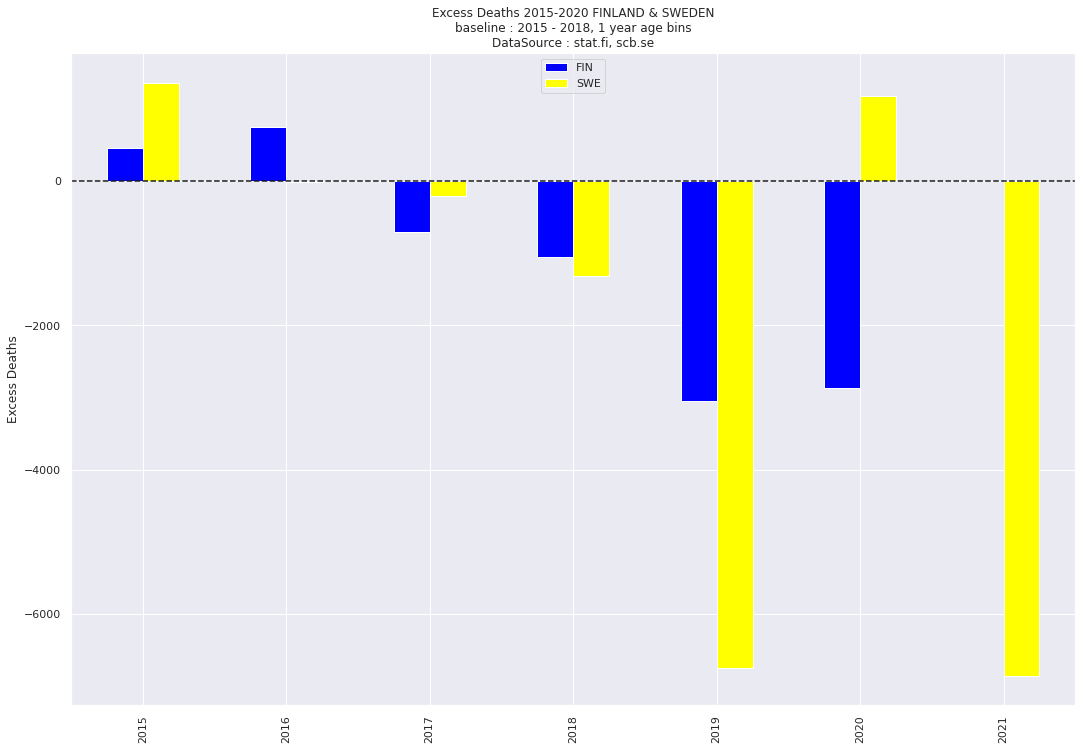

In [48]:
title = 'Excess Deaths 2015-2020 FINLAND & SWEDEN\nbaseline : 2015 - 2018, 1 year age bins\nDataSource : stat.fi, scb.se'
ax = fin_swe_yearly_excess.plot(kind='bar',figsize=(18,12),color=['blue','yellow'],title=title)
ax.axhline(0,ls='dashed',color='k')
ax.legend(loc='upper center')
ax.set_ylabel('Excess Deaths')
plt.savefig('FIN_SWE_excess_deaths.jpg',format='jpg')

In [49]:
swe_excess_pct = swe_actuals['dead'] / swe_yearly_expectation
swe_excess_pct

year
2015    1.015264
2016    0.999940
2017    0.997719
2018    0.985911
2019    0.929353
2020    1.012134
2021    0.930576
dtype: float64

In [50]:
fin_excess_pct = fin_age_dead.unstack().droplevel(level=0,axis=1).sum(axis=1) / fin_age_expectation.sum(axis=1)
fin_excess_pct

year
2015    1.008786
2016    1.014217
2017    0.986951
2018    0.980990
2019    0.946478
2020    0.950851
dtype: float64

In [51]:
fin_swe_excess_pct = pd.concat([fin_excess_pct,swe_excess_pct],axis=1)
fin_swe_excess_pct.columns = ['FIN','SWE']
fin_swe_excess_pct

,FIN,SWE
2015,1.008786,1.015264
2016,1.014217,0.999940
2017,0.986951,0.997719
2018,0.980990,0.985911
2019,0.946478,0.929353
2020,0.950851,1.012134
2021,NaN,0.930576


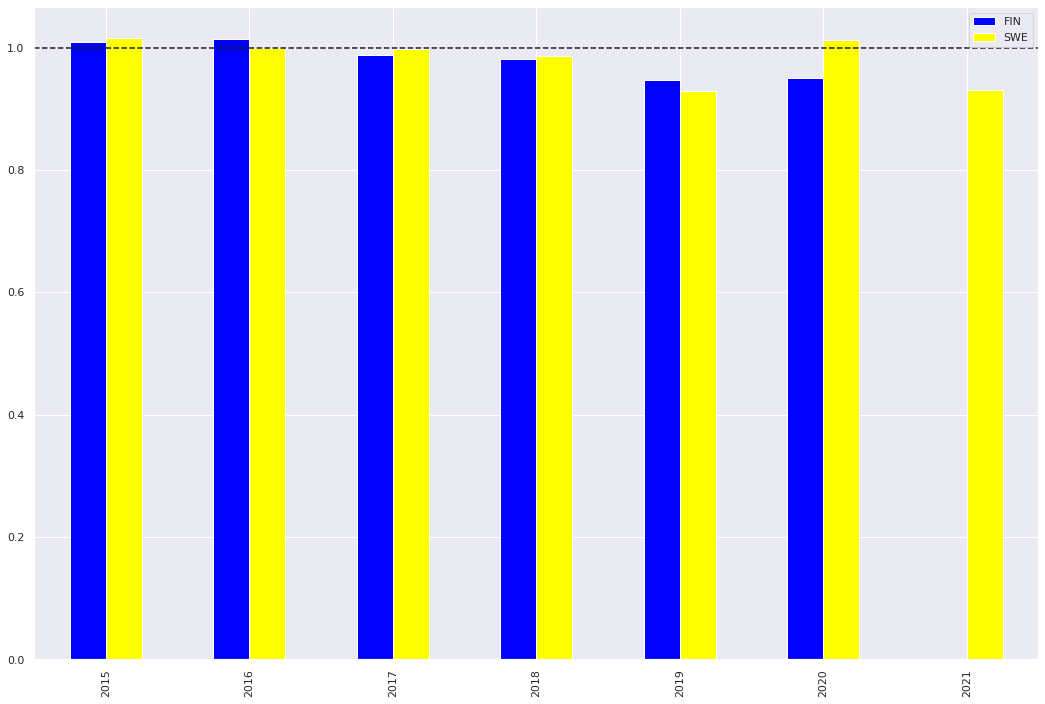

In [52]:
ax = fin_swe_excess_pct.plot(kind='bar',figsize=(18,12),color=['blue','yellow'])
ax.axhline(1,ls='dashed',color='k')

In [65]:
fin_age_mortality.unstack()

age,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
year,,,,,,,,,,,,,,,,,,,,,
2015,0.001746,0.000103,0.000135,0.000082,0.000065,0.000080,0.000016,0.000049,0.000033,0.000082,...,0.184284,0.189611,0.238342,0.244079,0.289375,0.297633,0.341988,0.381503,0.387569,0.536232
2016,0.001881,0.000143,0.000086,0.000084,0.000082,0.000196,0.000096,0.000048,0.000049,0.000082,...,0.173222,0.208160,0.217266,0.269013,0.288630,0.304912,0.388458,0.395604,0.452632,0.456442
2017,0.002016,0.000318,0.000142,0.000051,0.000101,0.000065,0.000081,0.000079,0.000080,0.000081,...,0.182914,0.187782,0.230934,0.236979,0.270377,0.307521,0.325271,0.375157,0.429752,0.481265
2018,0.002119,0.000275,0.000149,0.000142,0.000017,0.000000,0.000098,0.000065,0.000032,0.000032,...,0.174312,0.210646,0.218439,0.265612,0.289112,0.335875,0.361783,0.367006,0.372659,0.506187
2019,0.002099,0.000146,0.000137,0.000092,0.000071,0.000085,0.000033,0.000016,0.000032,0.000047,...,0.170563,0.200609,0.226235,0.235942,0.269252,0.287080,0.328244,0.380610,0.351240,0.449339
2020,0.001784,0.000108,0.000124,0.000116,0.000110,0.000018,0.000051,0.000066,0.000000,0.000064,...,0.174480,0.180697,0.218600,0.252590,0.272239,0.326966,0.328358,0.366328,0.400266,0.435453


In [54]:
swe_age_mortality.loc['2020'][40:50]

age
40    0.000758
41    0.000666
42    0.000873
43    0.000888
44    0.000890
45    0.001099
46    0.001159
47    0.001272
48    0.001128
49    0.001514
dtype: float64

In [55]:
### DEN ###
# Danmarks Statistik https://www.dst.dk/da/ 

def den_parse(file):
    
    den_file = pd.ExcelFile(file)
    den_age_df = den_file.parse(den_file.sheet_names[0])
    den_age_df.rename(columns={'Unnamed: 0' : 'Gender','Unnamed: 1' : 'Age'},inplace=True)

    den_age_df['Age'] = den_age_df['Age'].str.replace(' år.*','',regex=True).astype(int)
    den_age_df = den_age_df.groupby('Age').sum().T
    den_age_df.index.name='year'
    return den_age_df

den_age_dead = den_parse('DEN_dead.xlsx')
den_age_pop = den_parse('DEN_pop.xlsx')
print (den_age_dead.head())
den_age_pop

Age    0   1   2   3   4   5   6   7   8   9   ...    90    91    92    93  \
year                                           ...                           
2015  216   4   5   3   8   7   6   2   6   3  ...  1551  1495  1370  1274   
2016  194  20   5   5   4   6   8   1   6   8  ...  1619  1478  1335  1142   
2017  231  14   7  10   5   2   3   5   4   1  ...  1611  1523  1429  1303   
2018  226  13  11   1   3   4   4   3   6   4  ...  1751  1566  1400  1266   
2019  181  10   7   3   7   7   2   6   2   4  ...  1638  1481  1379  1200   

Age     94   95   96   97   98   99  
year                                 
2015  1063  875  631  466  377  768  
2016  1054  891  716  513  345  819  
2017   996  873  776  532  392  859  
2018  1099  884  736  657  471  852  
2019  1112  901  706  517  452  895  

[5 rows x 100 columns]


Age,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
year,,,,,,,,,,,,,,,,,,,,,
2015,57130,56748,59134,60389,64967,64546,67083,66122,67053,66143,...,0,0,0,0,0,0,0,0,0,0
2016,58605,57894,57484,59803,60962,65616,65147,67681,66672,67509,...,0,0,0,0,0,0,0,0,0,0
2017,62025,59253,58520,57977,60288,61484,66047,65636,68121,67155,...,0,0,0,0,0,0,0,0,0,0
2018,61731,62508,59523,58831,58205,60478,61705,66236,65871,68391,...,0,0,0,0,0,0,0,0,0,0
2019,61733,62046,62675,59608,58901,58352,60640,61798,66386,66077,...,0,0,0,0,0,0,0,0,0,0
2020,61466,61916,62148,62697,59661,58993,58415,60745,61926,66522,...,0,0,0,0,0,0,0,0,0,0


In [56]:
den_age_pop.sum(axis=1)

year
2015    5659715
2016    5707251
2017    5748769
2018    5781190
2019    5806081
2020    5822763
dtype: int64

In [57]:
den_age_dead.sum(axis=1)

year
2015    52555
2016    52824
2017    53261
2018    55232
2019    53958
2020    54645
dtype: int64

In [58]:
den_pop_99_plus = den_age_pop.loc[:,99:].sum(axis=1)
den_pop_99_plus

year
2015    1680
2016    1807
2017    1814
2018    1815
2019    1855
2020    1956
dtype: int64

In [59]:
den_age_pop = pd.concat([den_age_pop.loc[:,:98],den_pop_99_plus],axis=1,names=99)
den_age_pop.columns = range(100)
den_age_pop

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
year,,,,,,,,,,,,,,,,,,,,,
2015,57130,56748,59134,60389,64967,64546,67083,66122,67053,66143,...,9740,8061,6248,5422,4245,2824,2052,1418,1083,1680
2016,58605,57894,57484,59803,60962,65616,65147,67681,66672,67509,...,9810,8172,6658,4914,4236,3268,2092,1504,1003,1807
2017,62025,59253,58520,57977,60288,61484,66047,65636,68121,67155,...,9981,8262,6791,5400,3816,3273,2446,1531,1062,1814
2018,61731,62508,59523,58831,58205,60478,61705,66236,65871,68391,...,9763,8401,6773,5471,4183,2931,2425,1761,1117,1815
2019,61733,62046,62675,59608,58901,58352,60640,61798,66386,66077,...,9939,8117,6882,5446,4277,3159,2165,1708,1195,1855
2020,61466,61916,62148,62697,59661,58993,58415,60745,61926,66522,...,9717,8368,6701,5605,4323,3265,2322,1578,1193,1956


In [60]:
den_age_pop.sum(axis=1)

year
2015    5659715
2016    5707251
2017    5748769
2018    5781190
2019    5806081
2020    5822763
dtype: int64

In [61]:
den_age_mort = den_age_dead / den_age_pop
den_age_mort

Age,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
year,,,,,,,,,,,,,,,,,,,,,
2015,0.003781,0.000070,0.000085,0.000050,0.000123,0.000108,0.000089,0.000030,0.000089,0.000045,...,0.159240,0.185461,0.219270,0.234969,0.250412,0.309844,0.307505,0.328632,0.348107,0.457143
2016,0.003310,0.000345,0.000087,0.000084,0.000066,0.000091,0.000123,0.000015,0.000090,0.000119,...,0.165036,0.180861,0.200511,0.232397,0.248820,0.272644,0.342256,0.341090,0.343968,0.453237
2017,0.003724,0.000236,0.000120,0.000172,0.000083,0.000033,0.000045,0.000076,0.000059,0.000015,...,0.161407,0.184338,0.210426,0.241296,0.261006,0.266728,0.317253,0.347485,0.369115,0.473539
2018,0.003661,0.000208,0.000185,0.000017,0.000052,0.000066,0.000065,0.000045,0.000091,0.000058,...,0.179351,0.186406,0.206703,0.231402,0.262730,0.301604,0.303505,0.373083,0.421665,0.469421
2019,0.002932,0.000161,0.000112,0.000050,0.000119,0.000120,0.000033,0.000097,0.000030,0.000061,...,0.164805,0.182457,0.200378,0.220345,0.259995,0.285217,0.326097,0.302693,0.378243,0.482480
2020,0.003156,0.000129,0.000113,0.000080,0.000017,0.000085,0.000103,0.000049,0.000097,0.000015,...,0.162293,0.182600,0.207133,0.221588,0.264631,0.277182,0.289406,0.339670,0.373009,0.472393


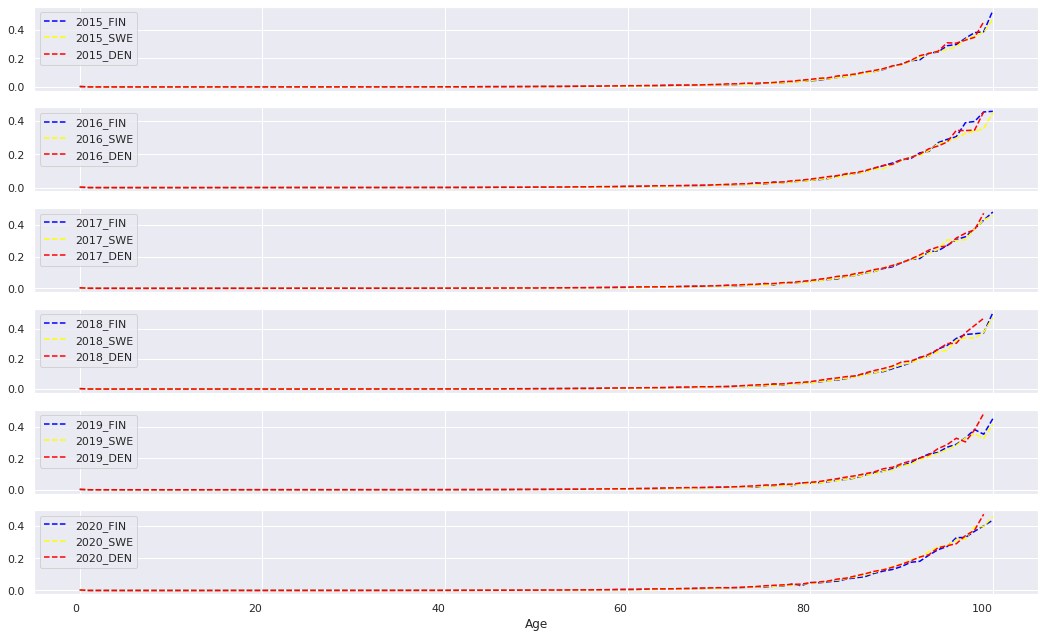

In [67]:
ax = fin_age_mortality.unstack().T.plot(color='blue',subplots=True,figsize=(18,12),ls='dashed')
swe_age_mortality.unstack().loc['2015':'2020'].T.plot(ax=ax,color='yellow',subplots=True,ls='dashed')
den_age_mort.T.plot(subplots=True,ax=ax,color='red',ls='dashed')

years = range(2015,2021)
countries = ['_FIN','_SWE','_DEN']

for i, a in enumerate(ax):
    a.legend( [ str(years[i]) + c for c in countries ])
    

In [68]:
den_std_mort = (den_age_mort * std_pop['pop']).sum(axis=1)
den_std_mort = den_std_mort / std_pop['pop'].sum()
den_std_mort

year
2015    0.011286
2016    0.011119
2017    0.010979
2018    0.011175
2019    0.010705
2020    0.010603
dtype: float64

In [69]:
### NOR ###
# Statistisk Centralbyrå https://www.ssb.no/ #
nor_pop_url = 'https://data.ssb.no/api/v0/no/table/07459/'
nor_pop_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Landet",
        "values": [
          "0"
        ]
      }
    },
    {
      "code": "Kjonn",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:AlleAldre00B",
        "values": [
          "000",
          "001",
          "002",
          "003",
          "004",
          "005",
          "006",
          "007",
          "008",
          "009",
          "010",
          "011",
          "012",
          "013",
          "014",
          "015",
          "016",
          "017",
          "018",
          "019",
          "020",
          "021",
          "022",
          "023",
          "024",
          "025",
          "026",
          "027",
          "028",
          "029",
          "030",
          "031",
          "032",
          "033",
          "034",
          "035",
          "036",
          "037",
          "038",
          "039",
          "040",
          "041",
          "042",
          "043",
          "044",
          "045",
          "046",
          "047",
          "048",
          "049",
          "050",
          "051",
          "052",
          "053",
          "054",
          "055",
          "056",
          "057",
          "058",
          "059",
          "060",
          "061",
          "062",
          "063",
          "064",
          "065",
          "066",
          "067",
          "068",
          "069",
          "070",
          "071",
          "072",
          "073",
          "074",
          "075",
          "076",
          "077",
          "078",
          "079",
          "080",
          "081",
          "082",
          "083",
          "084",
          "085",
          "086",
          "087",
          "088",
          "089",
          "090",
          "091",
          "092",
          "093",
          "094",
          "095",
          "096",
          "097",
          "098",
          "099",
          "100",
          "101",
          "102",
          "103",
          "104",
          "105+"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2015",
          "2016",
          "2017",
          "2018",
          "2019",
          "2020"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [70]:
r_pop_nor = requests.post(nor_pop_url,json=nor_pop_query)
r_pop_nor.status_code

200

In [71]:
# https://www.howtosolutions.net/2019/04/python-fixing-unexpected-utf-8-bom-error-when-loading-json-data/ #
r_pop_nor.encoding='utf-8-sig'

r_pop_nor.json()['data'][0]

{'key': ['0', '1', '000', '2015'], 'values': ['30544']}

In [72]:
# population as of Jan 1 2020 #
nor_age_pop_data = r_pop_nor.json()['data']

nor_age_pop = pd.DataFrame.from_dict(nor_age_pop_data)
nor_age_pop[['foo','gender','age','year']] = nor_age_pop['key'].to_list()
nor_age_pop.drop(['key','foo'],axis=1,inplace=True)
nor_age_pop['pop'] = nor_age_pop['values'].apply(lambda x : x[0])
nor_age_pop.drop('values',axis=1,inplace=True)
nor_age_pop['age'] = nor_age_pop['age'].replace('^00','',regex=True).str.rstrip('+').astype(int)

nor_age_pop['pop'] = nor_age_pop['pop'].astype(int)
nor_age_pop = nor_age_pop.groupby(['year','age']).sum()
nor_age_pop.groupby('year').sum()


,pop
year,
2015,5165802
2016,5213985
2017,5258317
2018,5295619
2019,5328212
2020,5367580


In [73]:
### NOR deaths ###
nor_dead_url = 'https://data.ssb.no/api/v0/no/table/10325/'
nor_dead_query = {
  "query": [
    {
      "code": "Kjonn",
      "selection": {
        "filter": "item",
        "values": [
          "0"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:AlleAldre00B",
        "values": [
          "000",
          "001",
          "002",
          "003",
          "004",
          "005",
          "006",
          "007",
          "008",
          "009",
          "010",
          "011",
          "012",
          "013",
          "014",
          "015",
          "016",
          "017",
          "018",
          "019",
          "020",
          "021",
          "022",
          "023",
          "024",
          "025",
          "026",
          "027",
          "028",
          "029",
          "030",
          "031",
          "032",
          "033",
          "034",
          "035",
          "036",
          "037",
          "038",
          "039",
          "040",
          "041",
          "042",
          "043",
          "044",
          "045",
          "046",
          "047",
          "048",
          "049",
          "050",
          "051",
          "052",
          "053",
          "054",
          "055",
          "056",
          "057",
          "058",
          "059",
          "060",
          "061",
          "062",
          "063",
          "064",
          "065",
          "066",
          "067",
          "068",
          "069",
          "070",
          "071",
          "072",
          "073",
          "074",
          "075",
          "076",
          "077",
          "078",
          "079",
          "080",
          "081",
          "082",
          "083",
          "084",
          "085",
          "086",
          "087",
          "088",
          "089",
          "090",
          "091",
          "092",
          "093",
          "094",
          "095",
          "096",
          "097",
          "098",
          "099",
          "100",
          "101",
          "102",
          "103",
          "104",
          "105+"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2015",
          "2016",
          "2017",
          "2018",
          "2019",
          "2020"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [74]:
r_dead_nor = requests.post(nor_dead_url,json=nor_dead_query)
r_dead_nor.status_code

200

In [75]:
r_dead_nor.encoding='utf-8-sig'

r_dead_nor.json()['data'][0]

{'key': ['0', '000', '2015'], 'values': ['139']}

In [76]:
nor_age_dead = pd.DataFrame.from_dict(r_dead_nor.json()['data'])
nor_age_dead[['foo','age','year']] = nor_age_dead['key'].to_list()
nor_age_dead.drop(['key','foo'],axis=1,inplace=True)
nor_age_dead['dead'] = nor_age_dead['values'].apply(lambda x : x[0])
nor_age_dead.drop('values',axis=1,inplace=True)
nor_age_dead['age'] = nor_age_dead['age'].replace('^00','',regex=True).str.rstrip('+').astype(int)

#nor_age_dead['dead'] = nor_age_dead['dead'].astype(int)

# check if all dead counts are numeric, and find the ones not # 
foo = nor_age_dead['dead'].str.isnumeric()
print (foo.loc[foo==False])

print (nor_age_dead.iloc[21])
nor_age_dead['dead'] = nor_age_dead['dead'].str.replace('-','0')
print (nor_age_dead['dead'].str.isnumeric().all())

# now we can convert death counts to int #
nor_age_dead['dead'] = nor_age_dead['dead'].astype(int)
nor_age_dead.set_index(['year','age'],inplace=True)
nor_age_dead

21    False
Name: dead, dtype: bool
age        3
year    2018
dead       -
Name: 21, dtype: object
True


,,dead
year,age,
2015,0,139
2016,0,128
2017,0,130
2018,0,129
2019,0,114
...,...,...
2016,105,21
2017,105,30
2018,105,22


In [77]:
nor_age_mort = nor_age_dead['dead'] / nor_age_pop['pop']
nor_age_mort

year  age
2015  0      0.002341
      1      0.000200
      2      0.000145
      3      0.000096
      4      0.000078
               ...   
2020  101    0.418519
      102    0.431694
      103    0.588235
      104    0.428571
      105    0.369863
Length: 636, dtype: float64

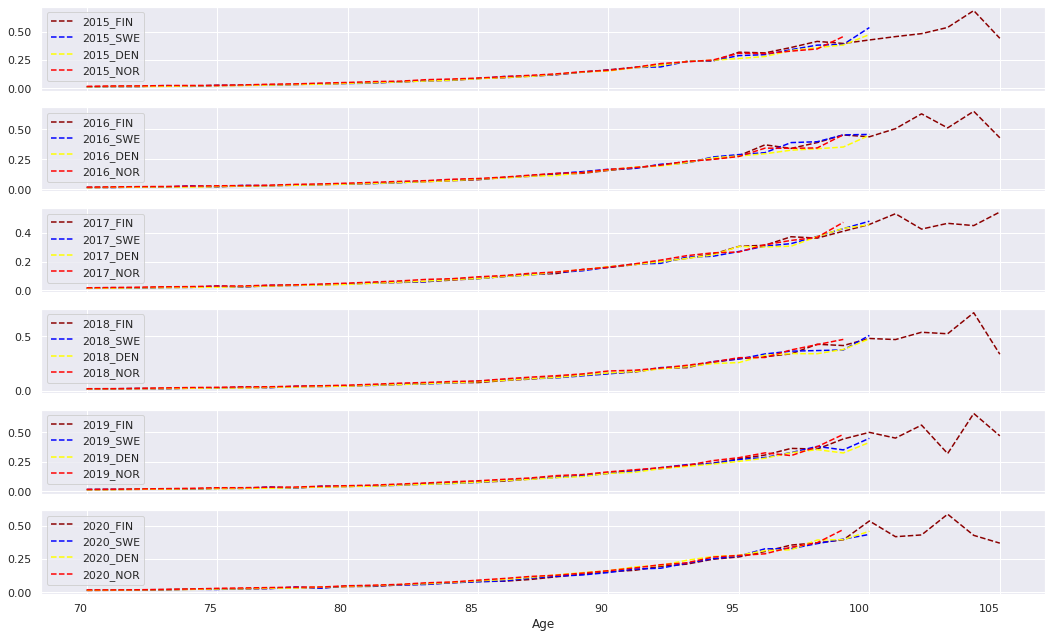

In [80]:
start_age = 70
ax = nor_age_mort.unstack().T.loc[start_age:].plot(subplots=True,figsize=(18,12),color='darkred',ls='dashed')
fin_age_mortality.unstack().T.loc[start_age:].plot(ax=ax,color='blue',subplots=True,figsize=(18,12),ls='dashed')
swe_age_mortality.unstack().loc['2015':'2020'].T.loc[start_age:].plot(ax=ax,color='yellow',subplots=True,ls='dashed')
den_age_mort.T.loc[start_age:].plot(subplots=True,ax=ax,color='red',ls='dashed')

years = range(2015,2021)
countries = ['_FIN','_SWE','_DEN','_NOR']

for i, a in enumerate(ax):
    a.legend( [ str(years[i]) + c for c in countries ])

In [81]:
# 2DO - convert SWE, FIN, NOR to age groups 0-99+ #

In [82]:
pop_df

pop
year age       
2002 0    82336
     1    92580
     2    92138
     3    90251
     4    91214
...         ...
2021 96    5652
     97    4180
     98    2800
     99    1857
     100   2900

[2020 rows x 1 columns]

In [83]:
idx = pd.IndexSlice

def merge_99_plus(df):
    return df.loc[idx[:,99:],:].groupby('year').sum()

fin_99_plus_pop = merge_99_plus(fin_age_pop)
swe_99_plus_pop = merge_99_plus(pop_df)
nor_99_plus_pop = merge_99_plus(nor_age_pop)

nor_99_plus_pop

,pop
year,
2015,1469
2016,1535
2017,1601
2018,1729
2019,1766
2020,1968


In [84]:
fin_99_plus_dead = merge_99_plus(fin_age_dead)
swe_99_plus_dead = merge_99_plus(dead_df).loc['2015':]
#nor_99_plus_dead = merge_99_plus(nor_age_dead)
nor_age_dead = nor_age_dead.sort_index()
nor_99_plus_dead = merge_99_plus(nor_age_dead)
nor_99_plus_dead

,dead
year,
2015,641
2016,736
2017,722
2018,792
2019,827
2020,870


In [85]:
def drop_and_add_99_plus(df,plus_99,param):
    temp = pd.concat([df.loc[idx[:,:98],:].unstack().droplevel(level=0,axis=1),plus_99[param]],axis=1)
    temp.columns = range(100)
    return temp

nor_age_99_pop = drop_and_add_99_plus(nor_age_pop,nor_99_plus_pop,'pop')
fin_age_99_pop = drop_and_add_99_plus(fin_age_pop,fin_99_plus_pop,'pop')
swe_age_99_pop = drop_and_add_99_plus(pop_df,swe_99_plus_pop,'pop').loc['2015':]
den_age_99_pop = den_age_pop

nor_age_99_dead = drop_and_add_99_plus(nor_age_dead,nor_99_plus_dead,'dead')
fin_age_99_dead = drop_and_add_99_plus(fin_age_dead,fin_99_plus_dead,'dead')
swe_age_99_dead = drop_and_add_99_plus(dead_df,swe_99_plus_dead,'dead').loc['2015':]
den_age_99_dead = den_age_dead

In [86]:

nor_age_99_mort = nor_age_99_dead / nor_age_99_pop
fin_age_99_mort = fin_age_99_dead / fin_age_99_pop
swe_age_99_mort = swe_age_99_dead / swe_age_99_pop
den_age_99_mort = den_age_99_dead / den_age_99_pop
swe_age_99_mort

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2015,0.002853,0.000178,0.000163,0.000059,0.000102,0.000025,0.000110,0.000077,0.000052,0.000061,...,0.154172,0.181682,0.204708,0.238285,0.248259,0.263796,0.281270,0.334270,0.359368,0.437067
2016,0.002875,0.000195,0.000109,0.000084,0.000117,0.000118,0.000130,0.000058,0.000059,0.000043,...,0.161197,0.184691,0.193486,0.221323,0.261687,0.277105,0.295551,0.325298,0.337432,0.408883
2017,0.002788,0.000132,0.000108,0.000082,0.000083,0.000074,0.000083,0.000040,0.000082,0.000033,...,0.164909,0.179460,0.199046,0.222222,0.246032,0.305123,0.301864,0.307292,0.374346,0.447469
2018,0.002350,0.000245,0.000146,0.000090,0.000097,0.000074,0.000041,0.000065,0.000063,0.000008,...,0.161409,0.174030,0.199003,0.218948,0.247312,0.256777,0.323871,0.339164,0.338057,0.435316
2019,0.002395,0.000194,0.000050,0.000112,0.000114,0.000096,0.000049,0.000032,0.000057,0.000031,...,0.151911,0.160956,0.191798,0.210965,0.230243,0.254155,0.280470,0.327038,0.353084,0.373601
2020,0.002751,0.000189,0.000101,0.000050,0.000096,0.000065,0.000056,0.000073,0.000040,0.000024,...,0.162247,0.190335,0.202647,0.240391,0.269223,0.277793,0.313365,0.319738,0.393424,0.433261
2021,0.002149,0.000200,0.000119,0.000067,0.000107,0.000048,0.000057,0.000072,0.000048,0.000080,...,0.148797,0.159624,0.185596,0.211088,0.224730,0.257520,0.281847,0.294498,0.316786,0.403406


In [87]:
std_pop_99 = fin_age_99_pop.loc['2019']
std_pop_99

0     45746
1     48090
2     51271
3     54114
4     56703
      ...  
95     3636
96     2616
97     1703
98     1114
99     1634
Name: 2019, Length: 100, dtype: int64

In [88]:
fin_std_99_mort = (fin_age_99_mort * std_pop_99).sum(axis=1) / std_pop_99.sum()
swe_std_99_mort = (swe_age_99_mort * std_pop_99).sum(axis=1) / std_pop_99.sum()
nor_std_99_mort = (nor_age_99_mort * std_pop_99).sum(axis=1) / std_pop_99.sum()
den_std_99_mort = (den_age_99_mort * std_pop_99).sum(axis=1) / std_pop_99.sum()

nordic_std_mortality = pd.concat([fin_std_99_mort,swe_std_99_mort,
                                 nor_std_99_mort,den_std_99_mort],axis=1)

nordic_std_mortality.columns = ['FIN','SWE','NOR','DEN']

nordic_std_mortality

,FIN,SWE,NOR,DEN
2015,0.010421,0.009850,0.010073,0.011361
2016,0.010503,0.009698,0.009900,0.011194
2017,0.010192,0.009669,0.009769,0.011057
2018,0.010153,0.009557,0.009612,0.011252
2019,0.009764,0.009004,0.009391,0.010784
2020,0.009869,0.009805,0.009195,0.010681
2021,NaN,0.009030,NaN,NaN


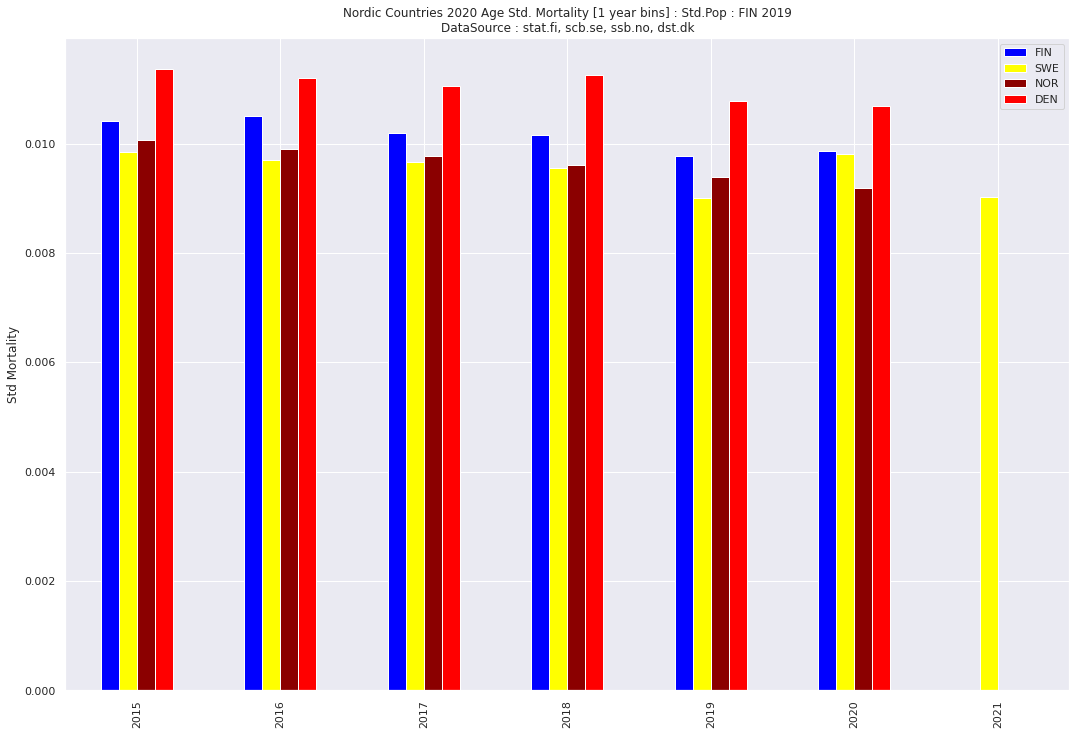

In [89]:

credit = '\nDataSource : stat.fi, scb.se, ssb.no, dst.dk'
title = 'Nordic Countries 2020 Age Std. Mortality [1 year bins] : Std.Pop : FIN 2019' + credit
nordic_std_mortality.plot(kind='bar',figsize=(18,12),color=['blue','yellow','darkred','red'],title=title)
plt.ylabel('Std Mortality')
plt.savefig('FIN_SWE_nordic_age_std_mortality.jpg',format='jpg')

In [90]:
### sanity check ###
print (fin_age_pop.groupby('year').sum()['pop'] == fin_age_99_pop.sum(axis=1))
print (fin_age_dead.groupby('year').sum()['dead'] == fin_age_99_dead.sum(axis=1))
print()

print (pop_df.groupby('year').sum().loc['2015':]['pop'] == swe_age_99_pop.sum(axis=1))
print (dead_df.groupby('year').sum().loc['2015':]['dead'] == swe_age_99_dead.sum(axis=1))
print()
print (nor_age_pop.groupby('year').sum()['pop'] == nor_age_99_pop.sum(axis=1))
print (nor_age_dead.groupby('year').sum()['dead'] == nor_age_99_dead.sum(axis=1))

print ()
print (den_age_pop.sum(axis=1) == den_age_99_pop.sum(axis=1))
print (den_age_dead.sum(axis=1) == den_age_99_dead.sum(axis=1))

year
2015    True
2016    True
2017    True
2018    True
2019    True
2020    True
dtype: bool
year
2015    True
2016    True
2017    True
2018    True
2019    True
2020    True
dtype: bool

year
2015    True
2016    True
2017    True
2018    True
2019    True
2020    True
2021    True
dtype: bool
year
2015    True
2016    True
2017    True
2018    True
2019    True
2020    True
2021    True
dtype: bool

year
2015    True
2016    True
2017    True
2018    True
2019    True
2020    True
dtype: bool
year
2015    True
2016    True
2017    True
2018    True
2019    True
2020    True
dtype: bool

year
2015    True
2016    True
2017    True
2018    True
2019    True
2020    True
dtype: bool
year
2015    True
2016    True
2017    True
2018    True
2019    True
2020    True
dtype: bool


In [91]:
swe_99_baseline = swe_age_99_mort.loc['2015' : '2018'].mean()
fin_99_baseline = fin_age_99_mort.loc['2015' : '2018'].mean()
nor_99_baseline = nor_age_99_mort.loc['2015' : '2018'].mean()
den_99_baseline = den_age_99_mort.loc['2015' : '2018'].mean()

swe_99_expectation = (swe_age_99_pop * swe_99_baseline).sum(axis=1)
fin_99_expectation = (fin_age_99_pop * fin_99_baseline).sum(axis=1)
nor_99_expectation = (nor_age_99_pop * nor_99_baseline).sum(axis=1)
den_99_expectation = (den_age_99_pop * den_99_baseline).sum(axis=1)

nordic_expectation = pd.concat([fin_99_expectation,swe_99_expectation,
                               nor_99_expectation,den_99_expectation],axis=1)

nordic_expectation.columns = ['FIN','SWE','NOR','DEN']

print (nordic_expectation.head())

swe_99_excess = dead_df.groupby('year').sum().loc['2015':,'dead'] - swe_99_expectation
fin_99_excess = fin_age_99_dead.sum(axis=1) - fin_99_expectation
nor_99_excess = nor_age_99_dead.sum(axis=1) - nor_99_expectation
den_99_excess = den_age_99_dead.sum(axis=1) - den_99_expectation

nordic_excess = pd.concat([fin_99_excess,swe_99_excess,nor_99_excess,den_99_excess],axis=1)
nordic_excess.columns = ['FIN','SWE','NOR','DEN']
nordic_excess

               FIN           SWE           NOR           DEN
2015  52036.784989  89540.947484  39791.669773  51837.158796
2016  53168.379176  90989.304442  40442.822738  52900.061508
2017  54433.975750  92177.871658  41124.278325  54053.902925
2018  55580.553808  93500.993987  41827.770157  55176.701413
2019  57005.725045  95531.285577  42582.740351  56207.234878


,FIN,SWE,NOR,DEN
2015,455.215011,1366.052516,935.330227,717.841204
2016,754.620824,-7.304442,283.177262,-76.061508
2017,-711.975750,-205.871658,-350.278325,-792.902925
2018,-1053.553808,-1315.993987,-987.770157,55.298587
2019,-3056.725045,-6765.285577,-1898.740351,-2249.234878
2020,-2871.049510,1173.396550,-2855.150768,-2872.890616
2021,NaN,-6854.806575,NaN,NaN


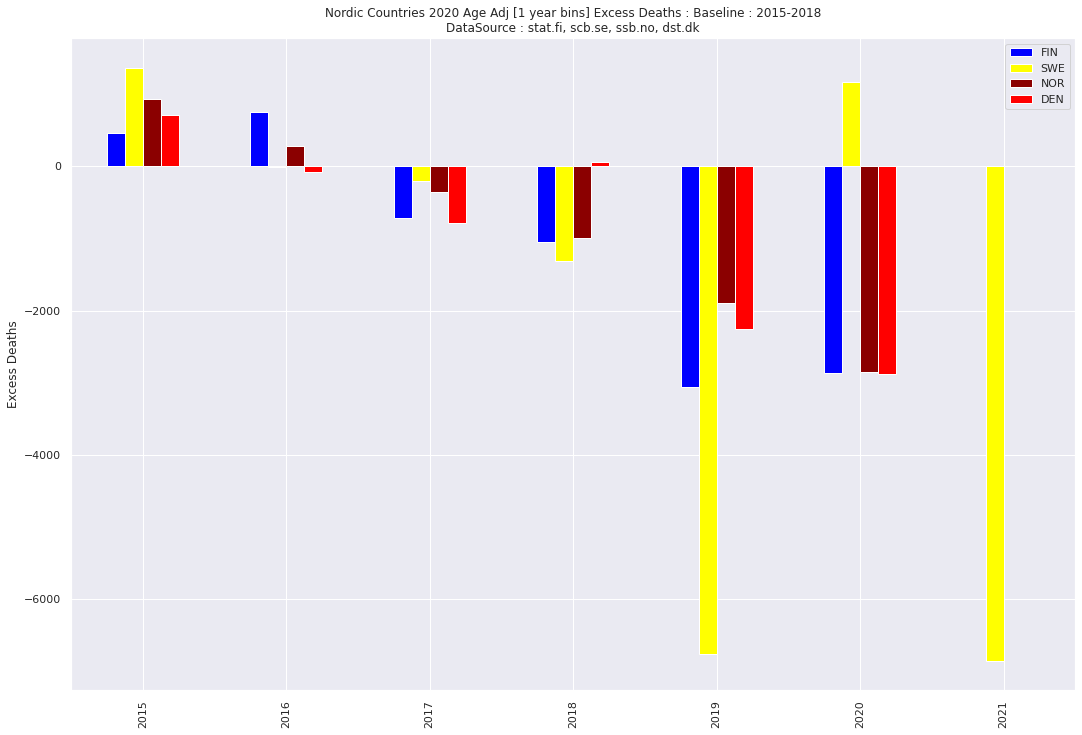

In [92]:
credit = '\nDataSource : stat.fi, scb.se, ssb.no, dst.dk'
title = 'Nordic Countries 2020 Age Adj [1 year bins] Excess Deaths : Baseline : 2015-2018' + credit
nordic_excess.plot(kind='bar',figsize=(18,12),color=['blue','yellow','darkred','red'],title=title)
plt.ylabel('Excess Deaths')
plt.savefig('FIN_SWE_nordic_excess.jpg',format='jpg')

,FIN,SWE,NOR,DEN
2015,0.008748,0.015256,0.023506,0.013848
2016,0.014193,-0.000080,0.007002,-0.001438
2017,-0.013080,-0.002233,-0.008518,-0.014669
2018,-0.018955,-0.014075,-0.023615,0.001002
2019,-0.053621,-0.070817,-0.044589,-0.040017
2020,-0.049196,0.012103,-0.065687,-0.049948
2021,NaN,-0.069372,NaN,NaN


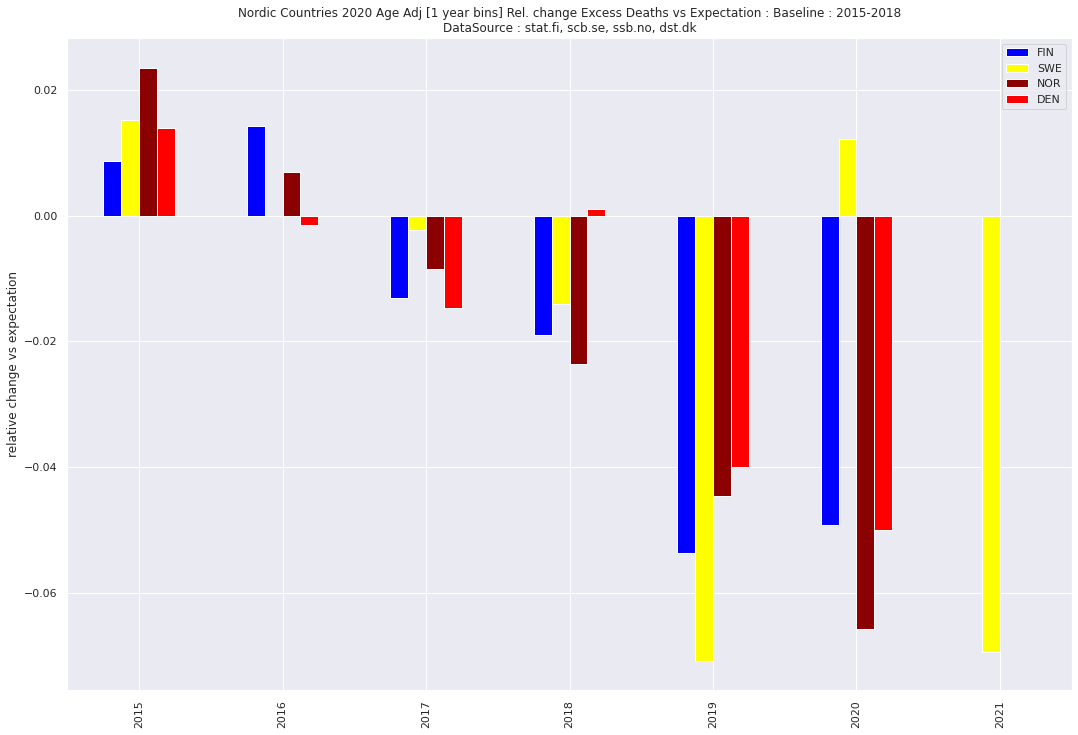

In [93]:
nordic_excess_pct = nordic_excess / nordic_expectation

credit = '\nDataSource : stat.fi, scb.se, ssb.no, dst.dk'
title = 'Nordic Countries 2020 Age Adj [1 year bins] Rel. change Excess Deaths vs Expectation : Baseline : 2015-2018' + credit
nordic_excess_pct.plot(figsize=(18,12),color=['blue','yellow','darkred','red'],kind='bar',title=title)
plt.ylabel('relative change vs expectation')
plt.savefig('FIN_SWE_nordic_rel_excess.jpg',format='jpg')
nordic_excess_pct

age
0      0.002099
1      0.000146
2      0.000137
3      0.000092
4      0.000071
         ...   
96     0.287080
97     0.328244
98     0.380610
99     0.351240
100    0.449339
Name: 2019, Length: 101, dtype: float64
90    0.153063
91    0.170563
92    0.200609
93    0.226235
94    0.235942
95    0.269252
96    0.287080
97    0.328244
98    0.380610
99    0.405753
Name: 2019, dtype: float64


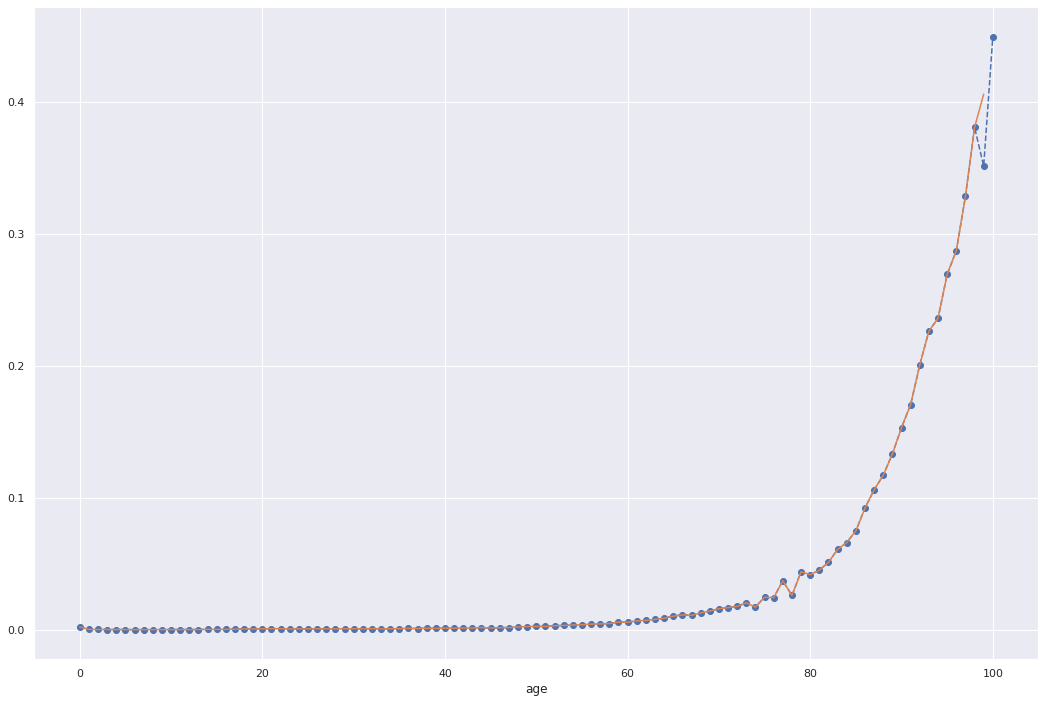

In [94]:
ax = fin_age_mortality.unstack().loc['2019'].plot(figsize=(18,12),ls='dashed',marker='o')
fin_age_99_mort.loc['2019'].plot(ax=ax)
print (fin_age_mortality.unstack().loc['2019'])
print (fin_age_99_mort.loc['2019'].tail(10))



In [95]:
fin_age_pop.loc['2019']

,pop
age,
0,45746
1,48090
2,51271
3,54114
4,56703
...,...
96,2616
97,1703
98,1114


In [96]:
fin_age_99_pop.loc['2019']

0     45746
1     48090
2     51271
3     54114
4     56703
      ...  
95     3636
96     2616
97     1703
98     1114
99     1634
Name: 2019, Length: 100, dtype: int64

In [97]:
fin_swe_std_dead_2015_2020

,FIN,SWE
year,,
2015,0.010420,0.009849
2016,0.010503,0.009697
2017,0.010191,0.009669
2018,0.010150,0.009556
2019,0.009764,0.009004
2020,0.009869,0.009805
2021,0.000000,0.009029


In [98]:
nordic_std_mortality

,FIN,SWE,NOR,DEN
2015,0.010421,0.009850,0.010073,0.011361
2016,0.010503,0.009698,0.009900,0.011194
2017,0.010192,0.009669,0.009769,0.011057
2018,0.010153,0.009557,0.009612,0.011252
2019,0.009764,0.009004,0.009391,0.010784
2020,0.009869,0.009805,0.009195,0.010681
2021,NaN,0.009030,NaN,NaN


In [99]:
den_age_dead

Age,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
year,,,,,,,,,,,,,,,,,,,,,
2015,216,4,5,3,8,7,6,2,6,3,...,1551,1495,1370,1274,1063,875,631,466,377,768
2016,194,20,5,5,4,6,8,1,6,8,...,1619,1478,1335,1142,1054,891,716,513,345,819
2017,231,14,7,10,5,2,3,5,4,1,...,1611,1523,1429,1303,996,873,776,532,392,859
2018,226,13,11,1,3,4,4,3,6,4,...,1751,1566,1400,1266,1099,884,736,657,471,852
2019,181,10,7,3,7,7,2,6,2,4,...,1638,1481,1379,1200,1112,901,706,517,452,895
2020,194,8,7,5,1,5,6,3,6,1,...,1577,1528,1388,1242,1144,905,672,536,445,924


In [100]:
### std mortality excluding ages above 99 ###

fin_less_100_mort = (fin_age_dead['dead'] / fin_age_pop['pop']).unstack().loc[:,:99]
swe_less_100_mort = (dead_df['dead'] / pop_df['pop']).unstack().loc[:,:99]
nor_less_100_mort = (nor_age_dead['dead'] / nor_age_pop['pop']).unstack().loc[:,:99]
den_less_100_mort = (den_age_dead / den_age_pop).loc[:,:99]

den_less_100_mort

Age,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
year,,,,,,,,,,,,,,,,,,,,,
2015,0.003781,0.000070,0.000085,0.000050,0.000123,0.000108,0.000089,0.000030,0.000089,0.000045,...,0.159240,0.185461,0.219270,0.234969,0.250412,0.309844,0.307505,0.328632,0.348107,0.457143
2016,0.003310,0.000345,0.000087,0.000084,0.000066,0.000091,0.000123,0.000015,0.000090,0.000119,...,0.165036,0.180861,0.200511,0.232397,0.248820,0.272644,0.342256,0.341090,0.343968,0.453237
2017,0.003724,0.000236,0.000120,0.000172,0.000083,0.000033,0.000045,0.000076,0.000059,0.000015,...,0.161407,0.184338,0.210426,0.241296,0.261006,0.266728,0.317253,0.347485,0.369115,0.473539
2018,0.003661,0.000208,0.000185,0.000017,0.000052,0.000066,0.000065,0.000045,0.000091,0.000058,...,0.179351,0.186406,0.206703,0.231402,0.262730,0.301604,0.303505,0.373083,0.421665,0.469421
2019,0.002932,0.000161,0.000112,0.000050,0.000119,0.000120,0.000033,0.000097,0.000030,0.000061,...,0.164805,0.182457,0.200378,0.220345,0.259995,0.285217,0.326097,0.302693,0.378243,0.482480
2020,0.003156,0.000129,0.000113,0.000080,0.000017,0.000085,0.000103,0.000049,0.000097,0.000015,...,0.162293,0.182600,0.207133,0.221588,0.264631,0.277182,0.289406,0.339670,0.373009,0.472393


In [101]:
std_pop_less_100 = fin_age_pop.unstack().droplevel(level=0,axis=1).loc['2019',:99]
std_pop_less_100

age
0     45746
1     48090
2     51271
3     54114
4     56703
      ...  
95     3636
96     2616
97     1703
98     1114
99      726
Name: 2019, Length: 100, dtype: int64

In [102]:
(std_pop_less_100 * fin_less_100_mort).sum(axis=1) / std_pop_less_100.sum()

year
2015    0.010334
2016    0.010430
2017    0.010114
2018    0.010068
2019    0.009692
2020    0.009799
dtype: float64

<AxesSubplot:>

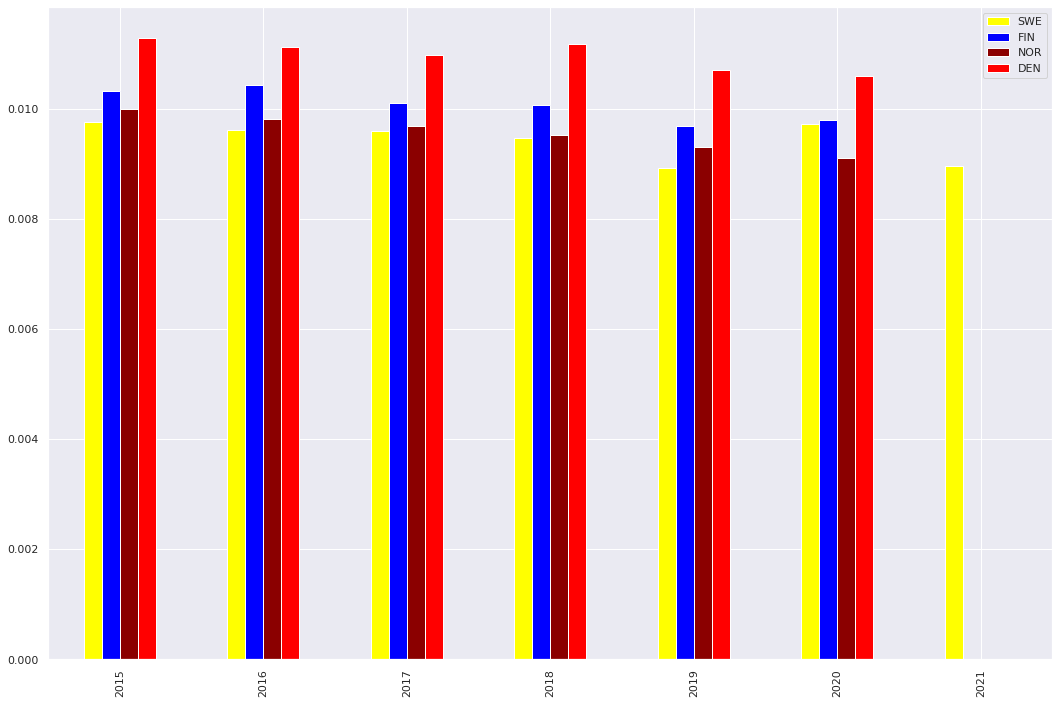

In [103]:
swe_less_100_std_mort = ((swe_less_100_mort * std_pop_less_100).dropna().sum(axis=1)) / std_pop_less_100.sum()
swe_less_100_std_mort = swe_less_100_std_mort.loc['2015':]
fin_less_100_std_mort = ((fin_less_100_mort * std_pop_less_100).dropna().sum(axis=1)) / std_pop_less_100.sum()
nor_less_100_std_mort = ((nor_less_100_mort * std_pop_less_100).dropna().sum(axis=1)) / std_pop_less_100.sum()
den_less_100_std_mort = ((den_less_100_mort * std_pop_less_100).dropna().sum(axis=1)) / std_pop_less_100.sum()

nordic_less_100_std_mort = pd.concat([swe_less_100_std_mort,fin_less_100_std_mort,
          nor_less_100_std_mort,den_less_100_std_mort],axis=1)

nordic_less_100_std_mort.columns = ['SWE','FIN','NOR','DEN']

nordic_less_100_std_mort.plot(kind='bar',figsize=(18,12),color=['yellow','blue','darkred','red'])

In [104]:
swe_100_vs_99 = pd.concat([fin_swe_std_dead_2015_2020["SWE"],nordic_std_mortality['SWE'],
                              nordic_less_100_std_mort['SWE']],axis=1)
swe_100_vs_99.columns=['SWE_100+','SWE_99+','SWE_99']
swe_100_vs_99

,SWE_100+,SWE_99+,SWE_99
year,,,
2015,0.009849,0.009850,0.009772
2016,0.009697,0.009698,0.009625
2017,0.009669,0.009669,0.009595
2018,0.009556,0.009557,0.009479
2019,0.009004,0.009004,0.008937
2020,0.009805,0.009805,0.009731
2021,0.009029,0.009030,0.008962


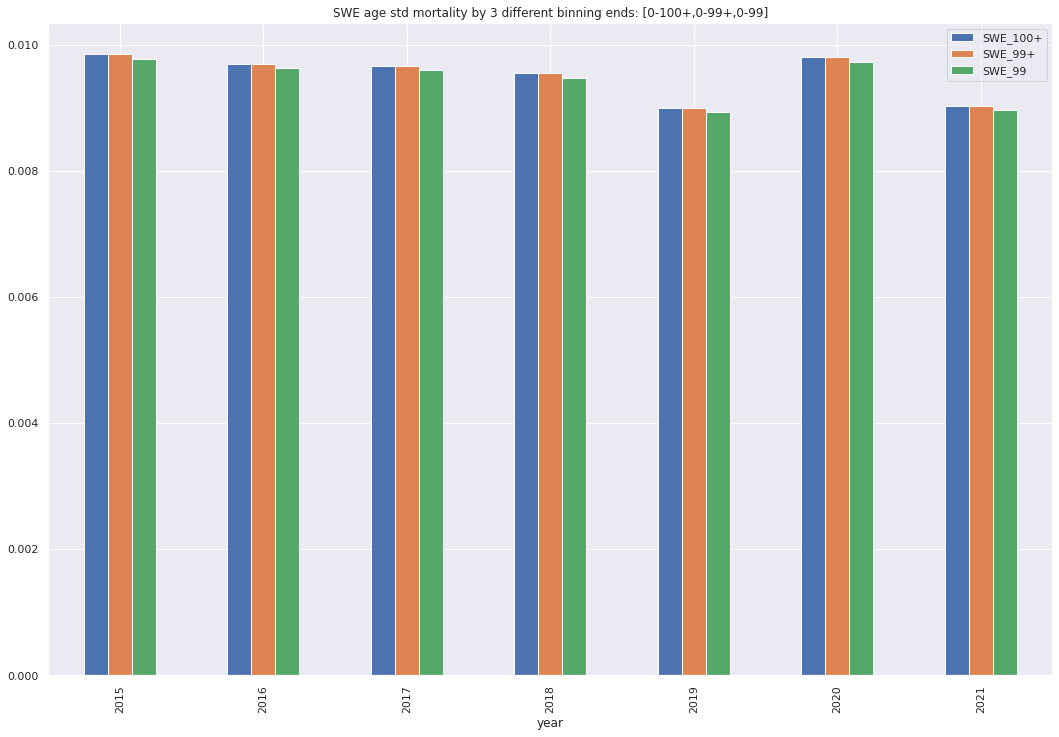

In [105]:
title = 'SWE age std mortality by 3 different binning ends: [0-100+,0-99+,0-99]'
swe_100_vs_99.plot(kind='bar',figsize=(18,12),title=title)

plt.savefig('FIN_SWE_3_different_bin_ends.jpg',format='jpg')

In [106]:
nordic_std_mortality

,FIN,SWE,NOR,DEN
2015,0.010421,0.009850,0.010073,0.011361
2016,0.010503,0.009698,0.009900,0.011194
2017,0.010192,0.009669,0.009769,0.011057
2018,0.010153,0.009557,0.009612,0.011252
2019,0.009764,0.009004,0.009391,0.010784
2020,0.009869,0.009805,0.009195,0.010681
2021,NaN,0.009030,NaN,NaN


In [107]:
nordic_less_100_std_mort = nordic_less_100_std_mort[['FIN','SWE','NOR','DEN']]
nordic_less_100_std_mort

,FIN,SWE,NOR,DEN
2015,0.010334,0.009772,0.009998,0.011287
2016,0.010430,0.009625,0.009819,0.011121
2017,0.010114,0.009595,0.009692,0.010981
2018,0.010068,0.009479,0.009533,0.011177
2019,0.009692,0.008937,0.009312,0.010706
2020,0.009799,0.009731,0.009118,0.010605
2021,NaN,0.008962,NaN,NaN


In [108]:
nordic_less_100_std_mort / nordic_std_mortality

,FIN,SWE,NOR,DEN
2015,0.991600,0.992148,0.992521,0.993551
2016,0.993018,0.992459,0.991838,0.993509
2017,0.992359,0.992338,0.992047,0.993125
2018,0.991701,0.991874,0.991717,0.993308
2019,0.992600,0.992637,0.991628,0.992811
2020,0.992887,0.992407,0.991584,0.992895
2021,NaN,0.992413,NaN,NaN


In [109]:

cebm_tables = pd.read_html('https://www.cebm.net/covid-19/excess-mortality-across-countries-in-2020/',header=0)
cebm_tables[0]['Percentage increase in Mortality per Age-Adjusted 100,000'] = \
cebm_tables[0]['Percentage increase in Mortality per Age-Adjusted 100,000'].apply(
    lambda x : x.rstrip('%')).astype(float)

cebm_tables[0]  = cebm_tables[0].sort_values('Percentage increase in Mortality per Age-Adjusted 100,000',
                                             ascending=False)

cebm_tables[0].set_index('Country',inplace=True)
cebm_tables[0]

,"Expected Age-standardised Mortality 2020 (per 100,000)","Age-standardised total mortality perÂ 100,000","Absolute excess age-standardised mortality per 100,000","Percentage increase in Mortality per Age-Adjusted 100,000"
Country,,,,
Poland,1216,1391,175.0,14.4
Chile*,1041,1184,143.0,13.8
USA,1020,1152,132.0,12.9
Spain,838,946,108.0,12.9
Belgium,956,1072,116.0,12.2
Bulgaria,1597,1788,191.0,12.0
Slovenia,996,1116,120.0,12.0
England & Wales,960,1060,100.0,10.5
Czechia,1147,1258,111.0,9.7


In [110]:
values = cebm_tables[0]['Percentage increase in Mortality per Age-Adjusted 100,000']
values

Country
Poland             14.4
Chile*             13.8
USA                12.9
Spain              12.9
Belgium            12.2
Bulgaria           12.0
Slovenia           12.0
England & Wales    10.5
Czechia             9.7
Italy               8.7
Austria             7.6
Scotland            7.5
Netherlands         7.2
Portugal            6.8
France              6.7
Israel              6.5
Canada              6.0
Lithuania           5.4
Greece*             4.9
Switzerland         4.3
Hungary             3.7
Germany*            3.3
Sweden              1.5
Slovakia            1.4
Luxembourg          1.1
Estonia             0.0
Latvia             -2.2
South Korea        -2.9
Finland            -3.1
Norway             -3.6
Iceland            -4.1
Denmark            -4.3
Name: Percentage increase in Mortality per Age-Adjusted 100,000, dtype: float64

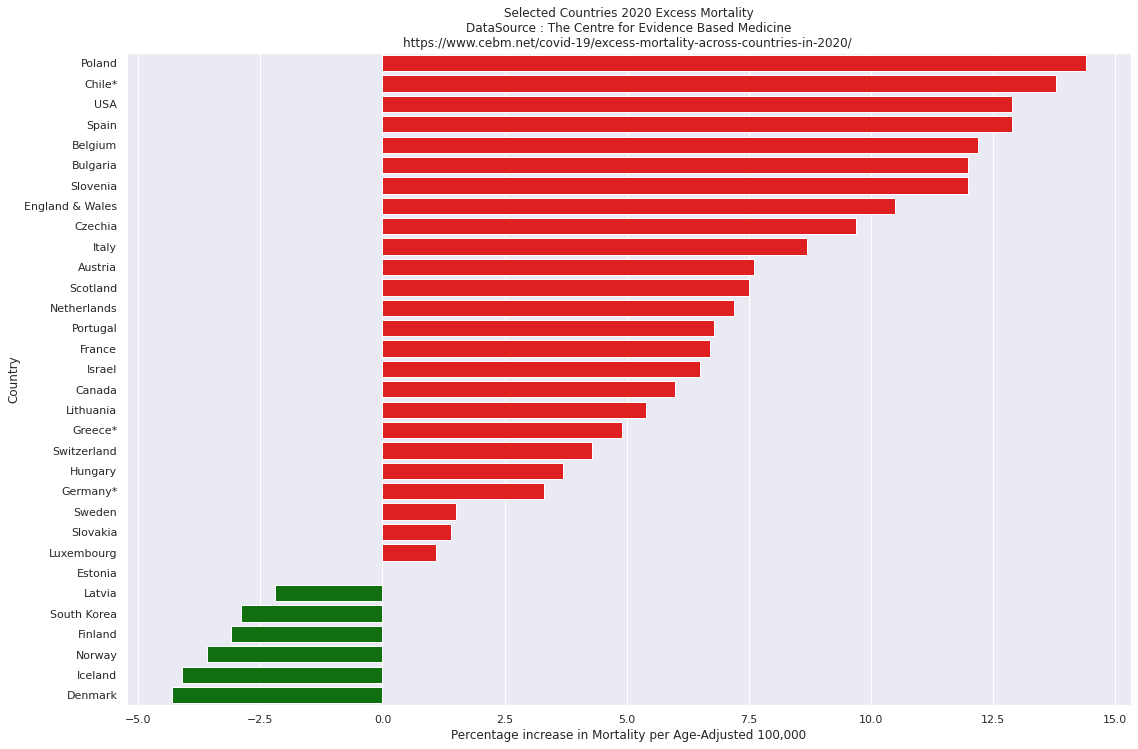

In [111]:
fig,ax = plt.subplots(figsize=(18,12))
plt.title('Selected Countries 2020 Excess Mortality\nDataSource : The Centre for Evidence Based Medicine\nhttps://www.cebm.net/covid-19/excess-mortality-across-countries-in-2020/ ')

values = cebm_tables[0]['Percentage increase in Mortality per Age-Adjusted 100,000']

colors = ['red' if x > 0 else 'green' for x in values ]
sns.barplot(y=cebm_tables[0].index,x='Percentage increase in Mortality per Age-Adjusted 100,000',
            data=cebm_tables[0],ax=ax,palette=colors)

plt.savefig('FIN_SWE_cebm_excess.jpg',format='jpg')

,"Expected Age-standardised Mortality 2020 (per 100,000)","Age-standardised total mortality perÂ 100,000","Absolute excess age-standardised mortality per 100,000","Percentage increase in Mortality per Age-Adjusted 100,000"
Country,,,,
Finland,948,919,-29.0,-3.1
Sweden,883,896,13.0,1.5
Norway,893,861,-32.0,-3.6
Denmark,1016,972,-44.0,-4.3


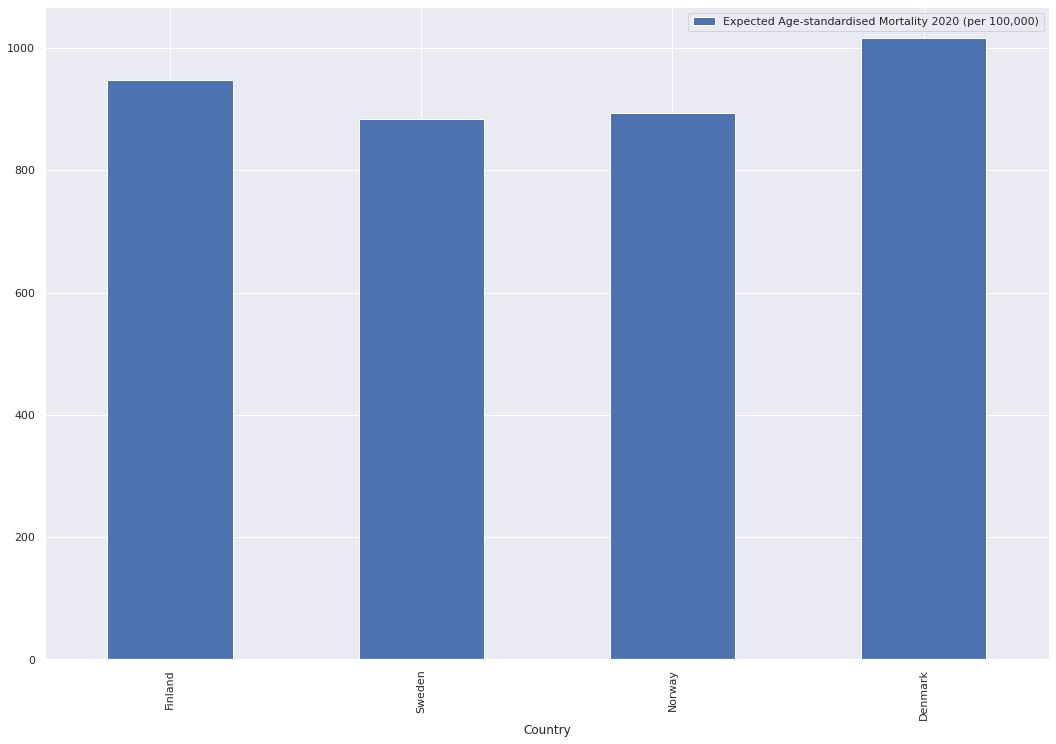

In [112]:
cebm_nordics = cebm_tables[0].loc[['Finland','Sweden','Norway','Denmark']]

cebm_nordics.plot(y='Expected Age-standardised Mortality 2020 (per 100,000)',kind='bar',figsize=(18,12))
cebm_nordics

<AxesSubplot:xlabel='Country'>

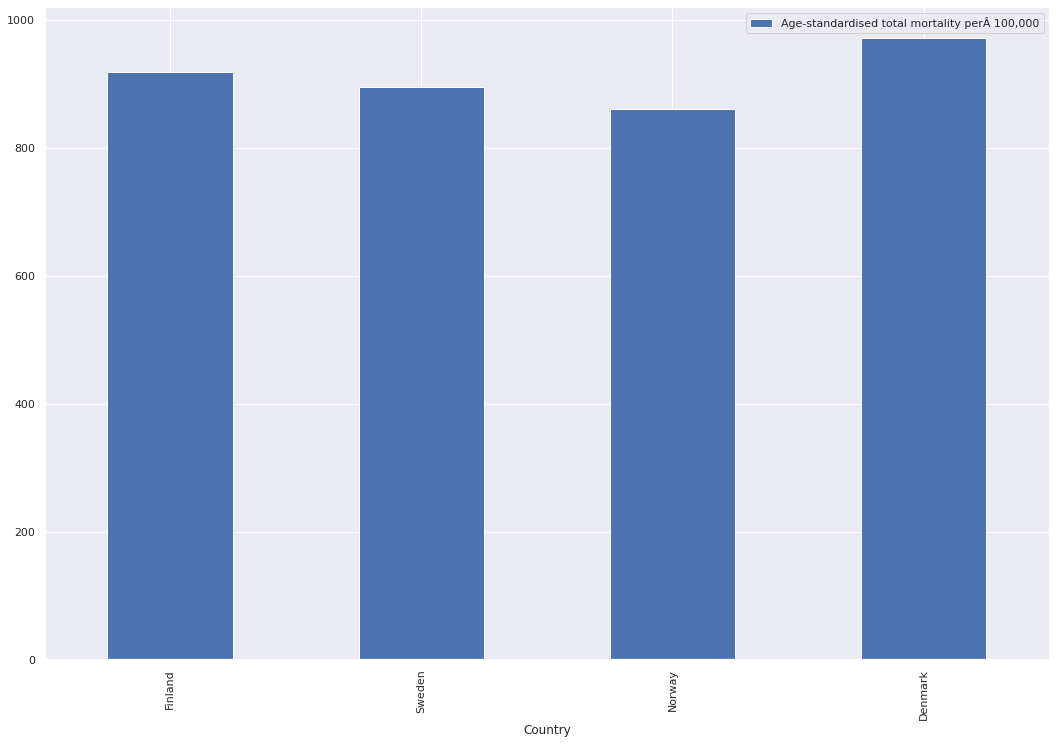

In [113]:
cebm_nordics.plot(y='Age-standardised total mortality perÂ 100,000',kind='bar',figsize=(18,12))


In [114]:
cebm_nordics.loc['Denmark'] / cebm_nordics.loc['Sweden']

Expected Age-standardised Mortality 2020 (per 100,000)       1.150623
Age-standardised total mortality perÂ 100,000                1.084821
Absolute excess age-standardised mortality per 100,000      -3.384615
Percentage increase in Mortality per Age-Adjusted 100,000   -2.866667
dtype: float64

In [115]:
nordic_std_mortality.loc['2020','DEN'] / nordic_std_mortality.loc['2020','SWE']

1.0892962103093906

<AxesSubplot:xlabel='Country'>

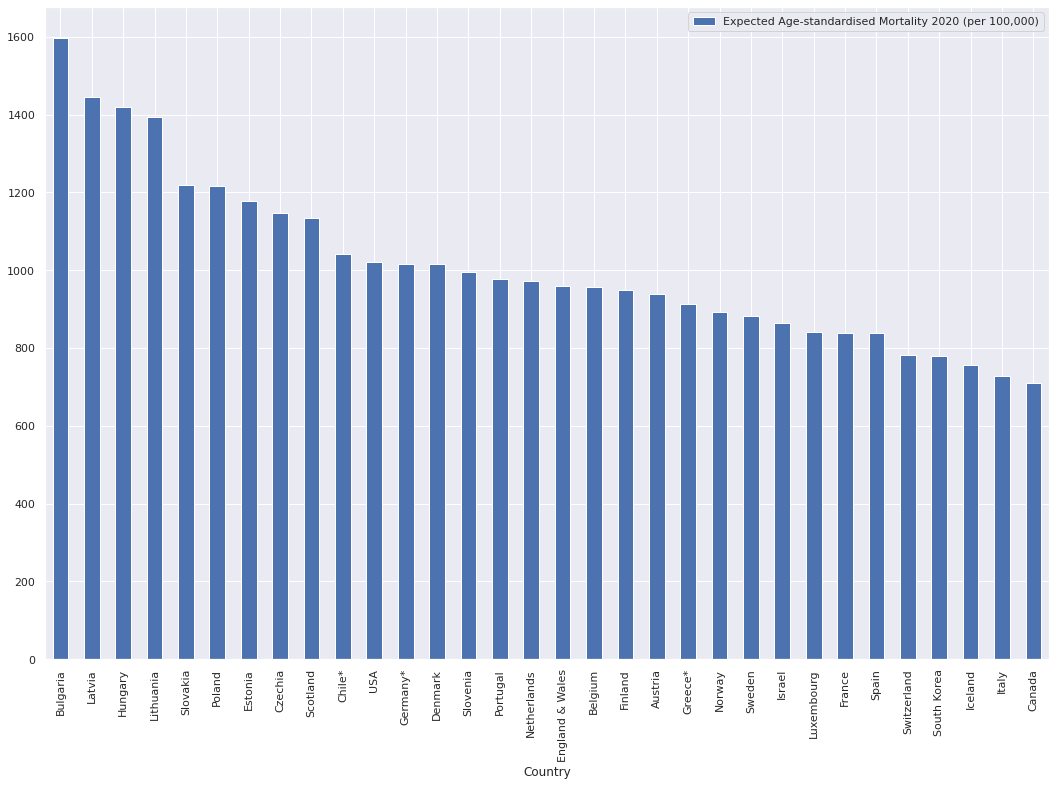

In [116]:
cebm_tables[0].sort_values(
    'Expected Age-standardised Mortality 2020 (per 100,000)',ascending=False).plot(y='Expected Age-standardised Mortality 2020 (per 100,000)',
                                    
kind='bar',figsize=(18,12))

In [117]:
### SECTION ###

# https://ec.europa.eu/eurostat/web/products-eurostat-news/-/edn-20210407-1 #

EU_life_expectancy_file = pd.ExcelFile('EU_life_expectancy.xlsx')
EU_life_expectancy_file

In [118]:
EU_LE_df = EU_life_expectancy_file.parse(sheet_name='Sheet 1',skiprows=9)
EU_LE_df = EU_LE_df.drop([0,1,2,3,4,5,57,58,59,60,61,62,63,64,65])
EU_LE_df.rename(columns={'TIME' : 'Country'},inplace=True)
EU_LE_df.set_index('Country',inplace=True)
EU_LE_df = EU_LE_df.replace(':',np.nan)
EU_LE_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Belgium to Georgia
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2002    39 non-null     float64
 1   2003    39 non-null     float64
 2   2004    39 non-null     float64
 3   2005    40 non-null     float64
 4   2006    46 non-null     float64
 5   2007    46 non-null     float64
 6   2008    46 non-null     float64
 7   2009    46 non-null     float64
 8   2010    46 non-null     float64
 9   2011    45 non-null     float64
 10  2012    46 non-null     float64
 11  2013    43 non-null     float64
 12  2014    45 non-null     float64
 13  2015    46 non-null     float64
 14  2016    46 non-null     float64
 15  2017    46 non-null     float64
 16  2018    46 non-null     float64
 17  2019    42 non-null     float64
 18  2020    31 non-null     float64
dtypes: float64(19)
memory usage: 8.0+ KB


In [119]:
SWE_LE = EU_LE_df.loc['Sweden']
SWE_LE

2002    80.0
2003    80.3
2004    80.7
2005    80.7
2006    81.0
2007    81.1
2008    81.3
2009    81.5
2010    81.6
2011    81.9
2012    81.8
2013    82.0
2014    82.3
2015    82.2
2016    82.4
2017    82.5
2018    82.6
2019    83.2
2020    82.4
Name: Sweden, dtype: float64

In [120]:
swe_LE_age_mort = (dead_df['dead'] / pop_df['pop']).dropna()
swe_LE_age_mort

year  age
2002  0      0.003801
      1      0.000259
      2      0.000271
      3      0.000111
      4      0.000110
               ...   
2021  96     0.281847
      97     0.294498
      98     0.316786
      99     0.375337
      100    0.421379
Length: 2020, dtype: float64

In [121]:
swe_LE_std_pop = pop_df.loc['2015']
swe_LE_std_pop

,pop
age,
0,98836
1,117672
2,116902
3,117727
4,117084
...,...
96,4725
97,3204
98,2215


In [122]:
swe_LE_std_mort = (swe_LE_std_pop['pop'] * swe_LE_age_mort).groupby('year').sum() / swe_LE_std_pop['pop'].sum()
swe_LE_std_mort

year
2002    0.011403
2003    0.011032
2004    0.010601
2005    0.010602
2006    0.010398
2007    0.010345
2008    0.010191
2009    0.009917
2010    0.009817
2011    0.009634
2012    0.009744
2013    0.009464
2014    0.009163
2015    0.009240
2016    0.009105
2017    0.009088
2018    0.008972
2019    0.008455
2020    0.009210
2021    0.008468
dtype: float64

In [123]:
SWE_LE_STD_MORT = pd.concat([SWE_LE,swe_LE_std_mort],axis=1)
SWE_LE_STD_MORT.columns=['Life_Expectancy','Std_mort']
SWE_LE_STD_MORT

,Life_Expectancy,Std_mort
2002,80.0,0.011403
2003,80.3,0.011032
2004,80.7,0.010601
2005,80.7,0.010602
2006,81.0,0.010398
2007,81.1,0.010345
2008,81.3,0.010191
2009,81.5,0.009917
2010,81.6,0.009817
2011,81.9,0.009634


In [124]:
SWE_LE_STD_MORT.corr()

,Life_Expectancy,Std_mort
Life_Expectancy,1.000000,-0.997482
Std_mort,-0.997482,1.000000


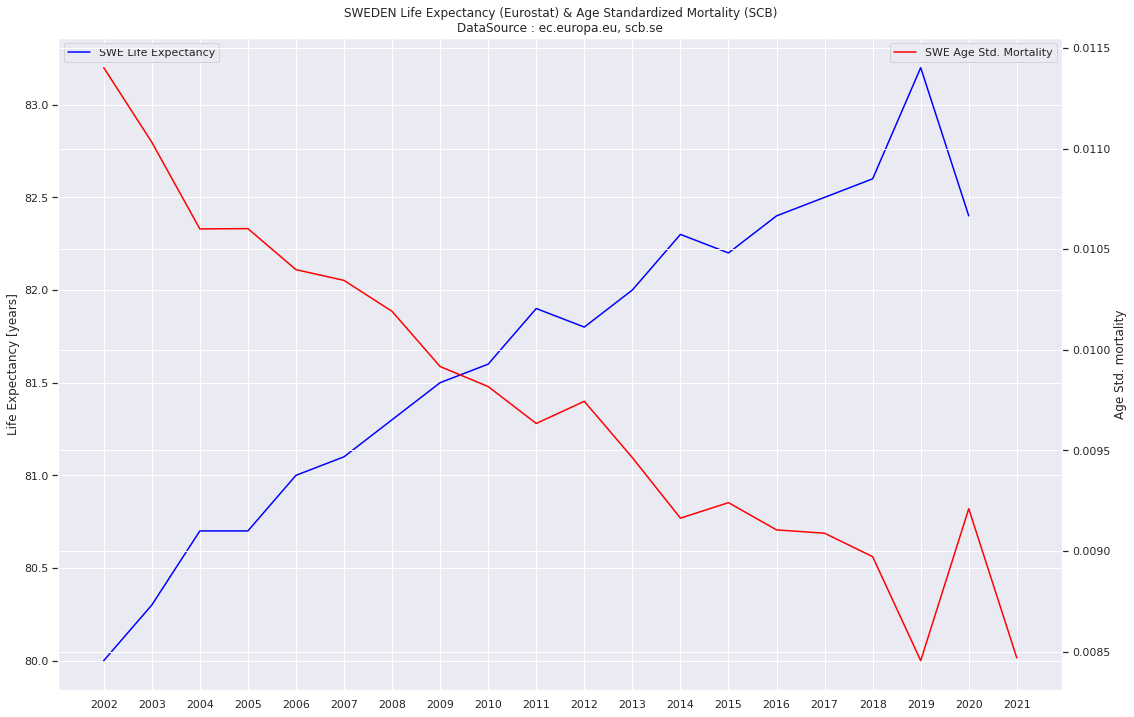

In [125]:
credit = '\nDataSource : ec.europa.eu, scb.se'
title = 'SWEDEN Life Expectancy (Eurostat) & Age Standardized Mortality (SCB)' + credit
fig,ax = plt.subplots(figsize=(18,12))
ax.plot(SWE_LE_STD_MORT['Life_Expectancy'],label='SWE Life Expectancy',color='blue')
ax2 = plt.twinx()
ax2.plot(SWE_LE_STD_MORT['Std_mort'],label='SWE Age Std. Mortality',color='red')
#ax2.invert_yaxis()

ax.legend(loc='upper left')
ax.set_ylabel('Life Expectancy [years]')
ax.set_title(title)

ax2.legend(loc='upper right')
ax2.set_ylabel('Age Std. mortality')

plt.savefig('FIN_SWE_LE_Mort.jpg',format='jpg')


In [126]:
EU_LE_df

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,
Belgium,78.2,78.3,79.0,79.1,79.5,79.9,79.8,80.2,80.3,80.7,80.5,80.7,81.4,81.1,81.5,81.6,81.7,82.1,80.9
Bulgaria,72.1,72.3,72.5,72.5,72.7,73.0,73.3,73.7,73.8,74.2,74.4,74.9,74.5,74.7,74.9,74.8,75.0,75.1,73.6
Czechia,75.4,75.3,75.9,76.1,76.7,77.0,77.3,77.4,77.7,78.0,78.1,78.3,78.9,78.7,79.1,79.1,79.1,79.3,78.3
Denmark,77.1,77.4,77.8,78.3,78.4,78.4,78.8,79.0,79.3,79.9,80.2,80.4,80.7,80.8,80.9,81.1,81.0,81.5,81.6
Germany (until 1990 former territory of the FRG),78.6,78.6,79.3,79.4,79.9,80.1,80.2,80.3,80.5,80.6,80.7,80.6,81.2,80.7,81.0,81.1,81.0,81.3,81.1
Germany including former GDR,78.6,78.6,79.3,79.4,79.9,80.1,80.2,80.3,80.5,80.6,80.7,80.6,81.2,80.7,81.0,81.1,81.0,81.3,81.1
Estonia,71.4,71.9,72.4,73.0,73.2,73.2,74.4,75.3,76.0,76.6,76.7,77.5,77.4,78.0,78.0,78.4,78.5,79.0,78.6
Ireland,77.7,78.2,78.6,79.0,79.3,79.7,80.2,80.2,80.8,80.9,80.9,81.0,81.4,81.5,81.7,82.2,82.2,82.8,NaN
Greece,79.2,79.3,79.4,79.6,79.9,79.7,80.2,80.4,80.6,80.8,80.7,81.4,81.5,81.1,81.5,81.4,81.9,81.7,81.2


In [127]:
EU_LE_baseline = (EU_LE_df.loc[:,'2015' : '2018'].mean(axis=1)).dropna()
EU_LE_2020_plus_baseline = pd.concat([EU_LE_baseline,EU_LE_df['2020']],axis=1)
EU_LE_2020_plus_baseline.columns = ['2015-2018','2020']
EU_LE_2020_plus_baseline = EU_LE_2020_plus_baseline.dropna()
EU_LE_2020_plus_baseline.sort_values('2015-2018',ascending=False,inplace=True)
EU_LE_2020_plus_baseline['diff'] = EU_LE_2020_plus_baseline['2020'] - EU_LE_2020_plus_baseline['2015-2018']
EU_LE_2020_plus_baseline

,2015-2018,2020,diff
Switzerland,83.550,83.2,-0.350
Spain,83.350,82.4,-0.950
Italy,83.150,82.4,-0.750
Liechtenstein,82.950,81.9,-1.050
France,82.650,82.3,-0.350
Norway,82.600,83.3,0.700
Iceland,82.550,83.1,0.550
Sweden,82.425,82.4,-0.025
Cyprus,82.400,82.3,-0.100
Malta,82.375,82.6,0.225


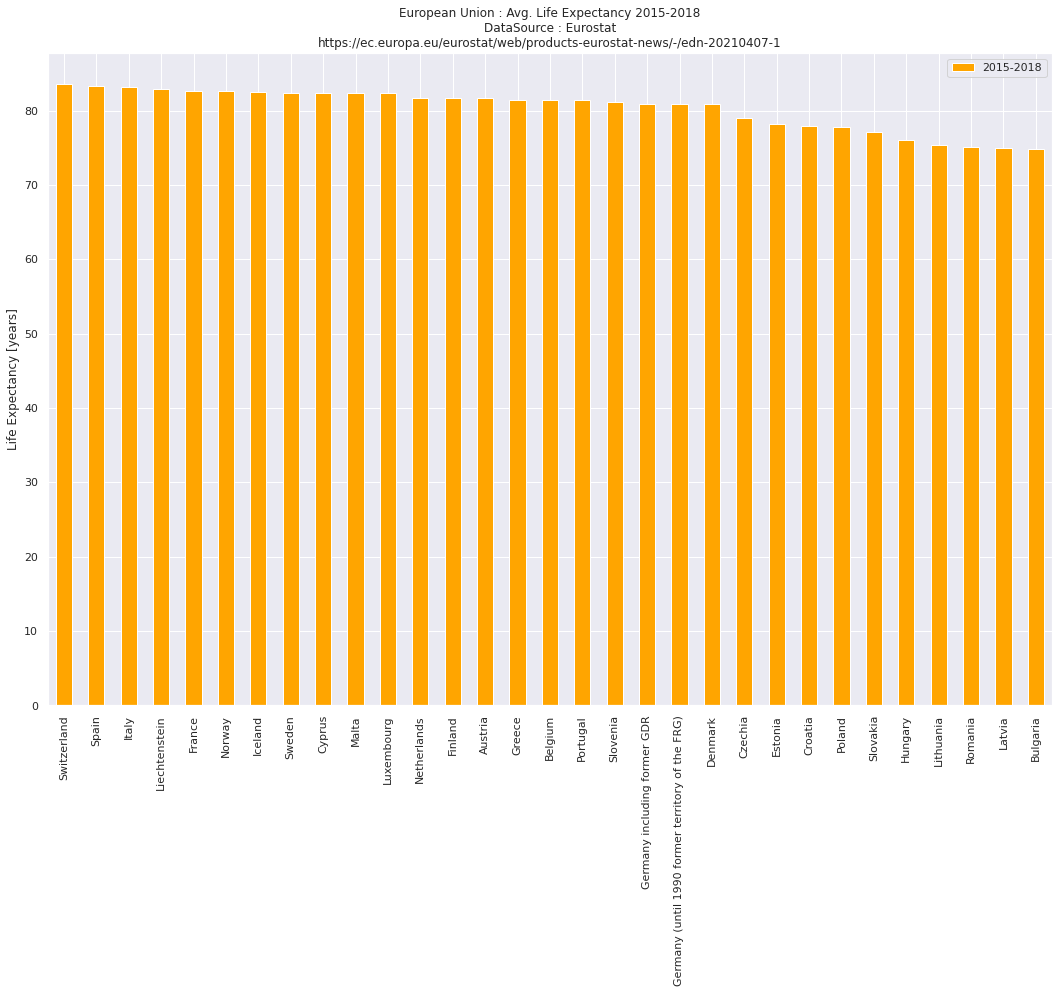

In [128]:
title = 'European Union : Avg. Life Expectancy 2015-2018\nDataSource : Eurostat'
credit = '\nhttps://ec.europa.eu/eurostat/web/products-eurostat-news/-/edn-20210407-1'

EU_LE_2020_plus_baseline.sort_values('2015-2018',ascending=False).plot(kind='bar',
                                                                       figsize=(18,12),
                                                                      color='orange',
                                                                      y='2015-2018',
                                                                      title=title+credit)
plt.ylabel('Life Expectancy [years]')
plt.savefig('FIN_SWE_EU_avg_LE.jpg',format='jpg')

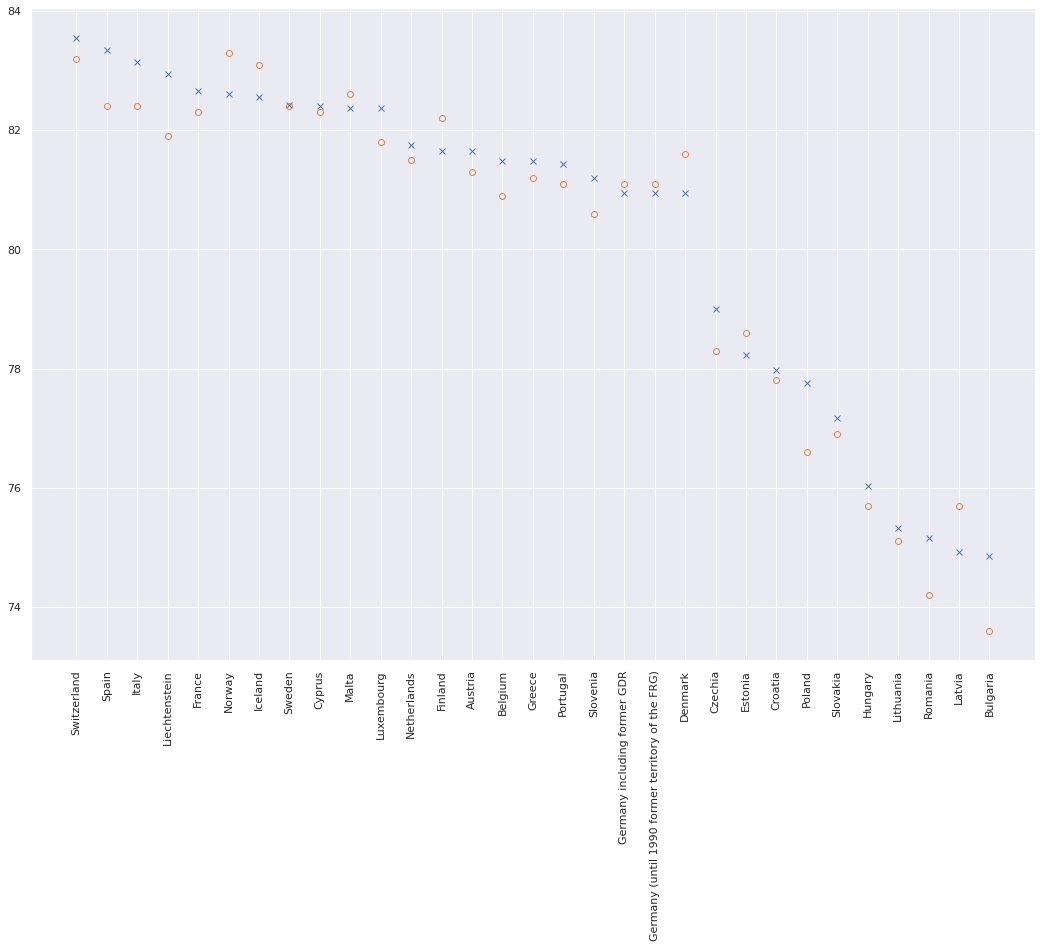

In [129]:
plt.figure(figsize=(18,12))
plt.plot(EU_LE_2020_plus_baseline['2015-2018'],'x',label='2015-2018')
plt.plot(EU_LE_2020_plus_baseline['2020'],marker='o',markerfacecolor='none',ls='none',label='2020')
_= plt.xticks(rotation=90)

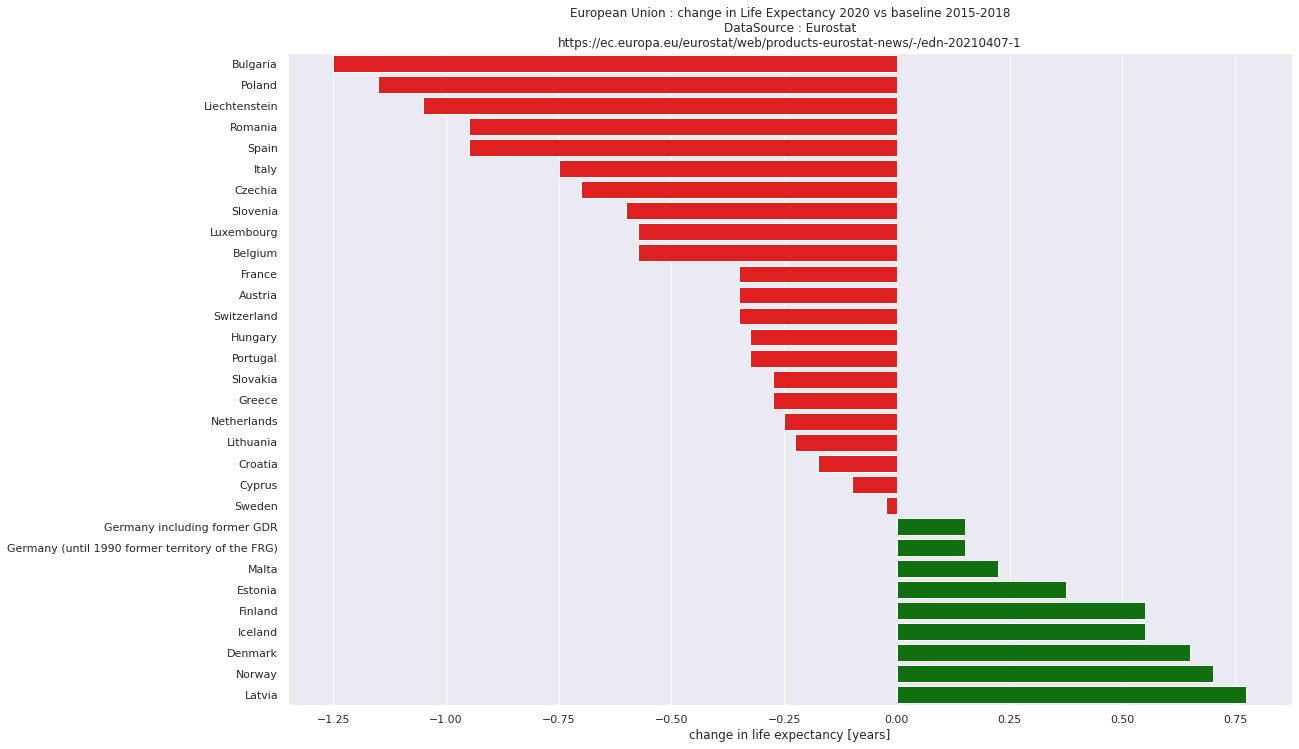

In [130]:
fig,ax = plt.subplots(figsize=(18,12))
EU_LE_2020_plus_baseline.sort_values('diff',inplace=True)

colors = ['red' if EU_LE_2020_plus_baseline['diff'][i] < 0 else 'green' for i in range(len(EU_LE_2020_plus_baseline))]

sns.barplot(y=EU_LE_2020_plus_baseline.index,data=EU_LE_2020_plus_baseline,
            x=EU_LE_2020_plus_baseline['diff'],palette=colors,ax=ax)

credit = '\nhttps://ec.europa.eu/eurostat/web/products-eurostat-news/-/edn-20210407-1'
ax.set_title('European Union : change in Life Expectancy 2020 vs baseline 2015-2018\nDataSource : Eurostat' + credit)
ax.set_xlabel('change in life expectancy [years]')

plt.savefig('FIN_SWE_EU_change_in_life_expectancy.jpg',format='jpg')

In [131]:
SWE_LE_STD_MORT

,Life_Expectancy,Std_mort
2002,80.0,0.011403
2003,80.3,0.011032
2004,80.7,0.010601
2005,80.7,0.010602
2006,81.0,0.010398
2007,81.1,0.010345
2008,81.3,0.010191
2009,81.5,0.009917
2010,81.6,0.009817
2011,81.9,0.009634


In [132]:
### Life Expectancy Calculation ###
# cmp https://ec.europa.eu/health/indicators/docs/echi_10_ds_en.pdf #

LE_initial_pop = 100000

remaining_pop = np.zeros(len(swe_age_99_mort.columns) + 1)
remaining_pop[0] = LE_initial_pop

year = 0
for yearly_risk in swe_age_99_mort.loc['2020']:
    remaining_pop[year+1] = remaining_pop[year] - (remaining_pop[year] * yearly_risk)
    
    year += 1
    
remaining_pop

array([100000.        ,  99724.94765795,  99706.10804017,  99696.08673828,
        99691.12142281,  99681.55398366,  99675.07868519,  99669.48878661,
        99662.23915919,  99658.24995697,  99655.83655419,  99648.09063977,
        99637.75502049,  99628.12516038,  99619.98873196,  99610.98519999,
        99596.61912478,  99573.74127077,  99551.42378799,  99523.44762604,
        99482.15903846,  99432.19883524,  99394.12813884,  99361.98256053,
        99317.42561768,  99270.90458254,  99219.26842169,  99172.69131539,
        99131.48154283,  99078.24370582,  99040.38790935,  98991.29913025,
        98942.08433312,  98896.88587465,  98848.12358676,  98794.6343424 ,
        98748.02904127,  98690.14321247,  98633.89781921,  98572.50931322,
        98510.81087532,  98436.14640346,  98370.62816278,  98284.74897985,
        98197.4958556 ,  98110.11557089,  98002.28734193,  97888.72230437,
        97764.20069366,  97653.96867104,  97506.07324031,  97337.93097511,
        97157.63469261,  

In [133]:
more_than_half_pop_remaining = remaining_pop > LE_initial_pop / 2
LE = np.argmin(more_than_half_pop_remaining) - 1
LE

85

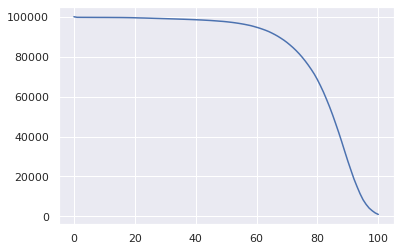

In [134]:
plt.plot(remaining_pop) 

0.30555555555555547


0     0.997249
1     0.997061
2     0.996961
3     0.996911
4     0.996816
        ...   
95    0.060007
96    0.041203
97    0.028029
98    0.017002
99    0.009635
Name: 2020, Length: 100, dtype: float64

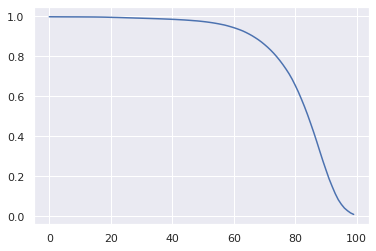

In [135]:
# p(living at end of year 1) = 1 - mort_0 # 
# (1-p_dead_0) * (1-p_dead_1) * ... (1-p_dead_99) #
# same principle as probability of at least 1 six in two throws of dice : 1 - (5/6 * 5/6) = 1 - 25/36
# https://www.pdx.edu/learning-center/sites/g/files/znldhr3391/files/2020-07/Probability_Dice.pdf
print (1 - (5/6 * 5/6))
P_living = (1 - swe_age_99_mort.loc['2020']).cumprod()
P_living.plot()
P_living

In [136]:
### LE Calculation ex ###
# https://ourworldindata.org/life-expectancy-how-is-it-calculated-and-how-should-it-be-interpreted #

df = pd.DataFrame({'pop' : [100,100,100,100],
                  'dead' : [10,1,2,3]},index=range(4))

df['mort'] = df['dead'] / df['pop']

def smooth_mort(mort,n=1):
    return 1 - np.exp(-n*mort)

# qnx is a smooth approximation of proportion dead within each age group, that is, smooth approx of mort rate 
# where n is the bin size 

df['qnx'] = smooth_mort(df['mort'])
df

,pop,dead,mort,qnx
0,100,10,0.10,0.095163
1,100,1,0.01,0.009950
2,100,2,0.02,0.019801
3,100,3,0.03,0.029554


In [137]:
### to use qnx for bins larger than 1, the mort rate param n must be the midpoint of the bin (avg ?) ###

def bin_category(df,binsize=10):
    
    binned = pd.cut(df.index.get_level_values(1),range(-1,100+binsize,binsize),labels=range(0,100+binsize,binsize))
    return binned

def binit(df,binsize=10):
    return df.groupby(['year',bin_category(df,binsize=binsize)]).sum()


swe_mort = pd.DataFrame((dead_df['dead'] / pop_df['pop']),columns=['mort_1']).dropna()
swe_mort['mort_1_qnx'] = smooth_mort(swe_mort['mort_1'])

swe_mort

mort_1  mort_1_qnx
year age                      
2002 0    0.003801    0.003794
     1    0.000259    0.000259
     2    0.000271    0.000271
     3    0.000111    0.000111
     4    0.000110    0.000110
...            ...         ...
2021 96   0.281847    0.245611
     97   0.294498    0.255094
     98   0.316786    0.271513
     99   0.375337    0.312942
     100  0.421379    0.343859

[2020 rows x 2 columns]

In [138]:
swe_mort_1 = (dead_df['dead'] / pop_df['pop']).dropna()
swe_mort_5 = (binit(dead_df['dead'],5) / binit(pop_df['pop'],5)).dropna()
swe_mort_10 = (binit(dead_df['dead'],10) / binit(pop_df['pop'],10)).dropna()

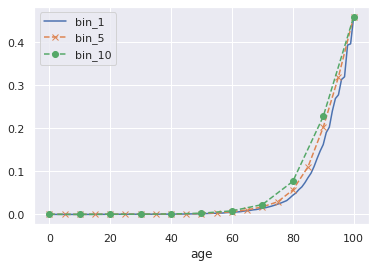

In [139]:
ax = swe_mort_1.loc['2020'].plot(label='bin_1')

swe_mort_5.loc['2020'].plot(ax=ax,label='bin_5',style='x--')
swe_mort_10.loc['2020'].plot(ax=ax,label='bin_10',style='o--')

plt.legend(loc='upper left')

<AxesSubplot:xlabel='age'>

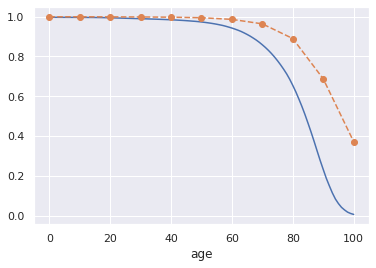

In [140]:
def dice_calc_p_survival(age_mort):
    P_living = (1 - age_mort).cumprod()
    return P_living

survival_1 = dice_calc_p_survival(swe_mort_1.loc['2020'])
survival_5 = dice_calc_p_survival(swe_mort_5.loc['2020'])
survival_10 = dice_calc_p_survival(swe_mort_10.loc['2020'])

ax = survival_1.plot()
survival_10.plot(ax=ax,style='o--')

In [141]:
swe_mort_1.loc['2020',90:]

year  age
2020  90     0.162247
      91     0.190335
      92     0.202647
      93     0.240391
      94     0.269223
      95     0.277793
      96     0.313365
      97     0.319738
      98     0.393424
      99     0.396345
      100    0.459300
dtype: float64

In [142]:
swe_mort_10.loc['2020']

0      0.000294
10     0.000170
20     0.000446
30     0.000533
40     0.001030
50     0.002842
60     0.008279
70     0.022863
80     0.076659
90     0.227549
100    0.459300
dtype: float64

<AxesSubplot:xlabel='age'>

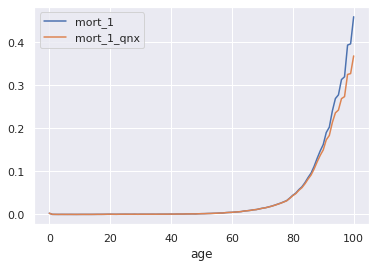

In [143]:
swe_mort.loc['2020'].plot()

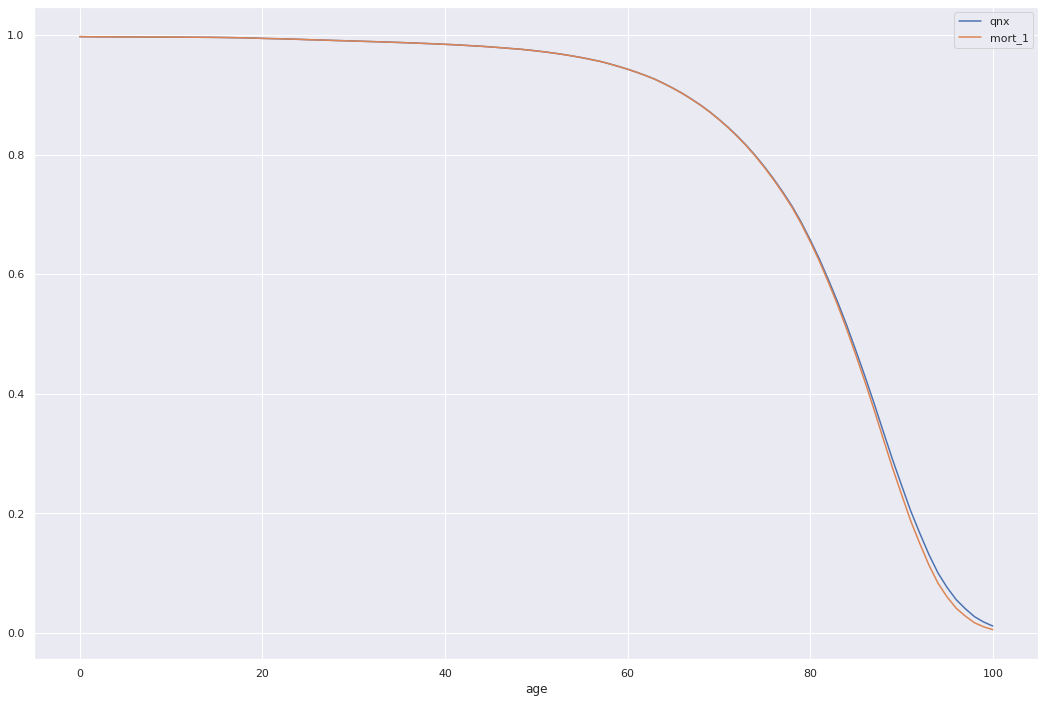

In [144]:
LE_qnx = (1 - swe_mort.loc['2020','mort_1_qnx']).cumprod()
ax = LE_qnx.plot(figsize=(18,12),label='qnx')

survival_1.plot(ax=ax,label='mort_1')
plt.legend(loc='upper right')

In [145]:
print ((survival_1 > .5).idxmin())
print ((P_living > 0.5).idxmin())

85
85


In [146]:
# https://scb.se/hitta-statistik/artiklar/2013/Medellivslangd--matt-med-gamla-anor/#

swe_mort_data = pd.concat([dead_df,pop_df],axis=1).dropna()
swe_mort_data['mort'] = swe_mort_data['dead'] / swe_mort_data['pop']

### survival countdown by age group ###
swe_survival = swe_mort_data.groupby('year',group_keys=False).apply(
    lambda row :100000 - (row['mort'] * row['pop']).cumsum())



In [147]:
swe_mort_data['survival'] = swe_survival

idx = pd.IndexSlice

swe_mort_data.loc[idx['2020',:],:]

dead       pop      mort  survival
year age                                    
2020 0     268   97436.0  0.002751   99732.0
     1      22  116454.0  0.000189   99710.0
     2      12  119393.0  0.000101   99698.0
     3       6  120471.0  0.000050   99692.0
     4      12  125038.0  0.000096   99680.0
...        ...       ...       ...       ...
     96   1789    5709.0  0.313365    6217.0
     97   1270    3972.0  0.319738    4947.0
     98   1065    2707.0  0.393424    3882.0
     99    759    1915.0  0.396345    3123.0
     100  1247    2715.0  0.459300    1876.0

[101 rows x 4 columns]

In [148]:
swe_mort_data['count_at_start_of_period'] = swe_mort_data.survival.groupby('year').shift()
swe_mort_data.loc['2020']

,dead,pop,mort,survival,count_at_start_of_period
age,,,,,
0,268,97436.0,0.002751,99732.0,NaN
1,22,116454.0,0.000189,99710.0,99732.0
2,12,119393.0,0.000101,99698.0,99710.0
3,6,120471.0,0.000050,99692.0,99698.0
4,12,125038.0,0.000096,99680.0,99692.0
...,...,...,...,...,...
96,1789,5709.0,0.313365,6217.0,8006.0
97,1270,3972.0,0.319738,4947.0,6217.0
98,1065,2707.0,0.393424,3882.0,4947.0


In [149]:
### set age grp 0 to 100000 for each year ###
swe_mort_data['count_at_start_of_period'] = swe_mort_data.groupby('year',group_keys=False).apply(
    lambda row : row['count_at_start_of_period'].replace(np.NaN,100000))

swe_mort_data.loc['2020']

,dead,pop,mort,survival,count_at_start_of_period
age,,,,,
0,268,97436.0,0.002751,99732.0,100000.0
1,22,116454.0,0.000189,99710.0,99732.0
2,12,119393.0,0.000101,99698.0,99710.0
3,6,120471.0,0.000050,99692.0,99698.0
4,12,125038.0,0.000096,99680.0,99692.0
...,...,...,...,...,...
96,1789,5709.0,0.313365,6217.0,8006.0
97,1270,3972.0,0.319738,4947.0,6217.0
98,1065,2707.0,0.393424,3882.0,4947.0


In [150]:
### dead during period contribute half year to years_lived ###
### except for age grp 0 who only contribute 15% ###
idx = pd.IndexSlice

swe_mort_data['years_lived'] = swe_mort_data['count_at_start_of_period'] + swe_mort_data['dead'] / 2
swe_mort_data.loc[idx[:,0],'years_lived'] = swe_mort_data.loc[
    idx[:,0],'count_at_start_of_period'] + swe_mort_data.loc[idx[:,0],'dead'] / (1 / 0.15)
#swe_mort_data.loc[idx[:,0],'years_lived']

In [151]:
swe_mort_data.loc['2020']

,dead,pop,mort,survival,count_at_start_of_period,years_lived
age,,,,,,
0,268,97436.0,0.002751,99732.0,100000.0,100040.2
1,22,116454.0,0.000189,99710.0,99732.0,99743.0
2,12,119393.0,0.000101,99698.0,99710.0,99716.0
3,6,120471.0,0.000050,99692.0,99698.0,99701.0
4,12,125038.0,0.000096,99680.0,99692.0,99698.0
...,...,...,...,...,...,...
96,1789,5709.0,0.313365,6217.0,8006.0,8900.5
97,1270,3972.0,0.319738,4947.0,6217.0,6852.0
98,1065,2707.0,0.393424,3882.0,4947.0,5479.5


In [152]:
swe_mort_data.loc['2020','years_lived'] / swe_mort_data.loc['2020','count_at_start_of_period']

age
0      1.000402
1      1.000110
2      1.000060
3      1.000030
4      1.000060
         ...   
96     1.111729
97     1.102139
98     1.107641
99     1.097759
100    1.199648
Length: 101, dtype: float64

In [153]:
### reverse cum_years ###
swe_mort_data['cum_years'] = swe_mort_data.groupby('year')['years_lived'].transform(lambda x : x[::-1].cumsum()).values
swe_mort_data['cum_years'] = swe_mort_data.groupby('year')['cum_years'].transform(lambda x : x[::-1])
swe_mort_data

dead      pop      mort  survival  count_at_start_of_period  \
year age                                                                
2002 0     313  82336.0  0.003801   99687.0                  100000.0   
     1      24  92580.0  0.000259   99663.0                   99687.0   
     2      25  92138.0  0.000271   99638.0                   99663.0   
     3      10  90251.0  0.000111   99628.0                   99638.0   
     4      10  91214.0  0.000110   99618.0                   99628.0   
...        ...      ...       ...       ...                       ...   
2021 96   1593   5652.0  0.281847   12079.0                   13672.0   
     97   1231   4180.0  0.294498   10848.0                   12079.0   
     98    887   2800.0  0.316786    9961.0                   10848.0   
     99    697   1857.0  0.375337    9264.0                    9961.0   
     100  1222   2900.0  0.421379    8042.0                    9264.0   

          years_lived   cum_years  
year age                           
2002 0      100046.95  8089809.95  
     1       99699.00  7989763.00  
     2       99675.50  7890064.00  
     3       99643.00  7790388.50  
     4       99633.00  7690745.50  
...               ...         ...  
2021 96      14468.50    58639.00  
     97      12694.50    44170.50  
     98      11291.50    31476.00  
     99      10309.50    20184.50  
     100      9875.00     9875.00  

[2020 rows x 7 columns]

In [154]:
# https://www.folkhalsomyndigheten.se/folkhalsorapportering-statistik/tolkad-rapportering/folkhalsans-utveckling/resultat/halsa/medellivslangd/#
# FHM 2019 LE : 83.1

# stämmer inte riktigt med https://www.scb.se/hitta-statistik/sverige-i-siffror/manniskorna-i-sverige/medellivslangd-i-sverige/
swe_mort_LE = swe_mort_data['cum_years'] / swe_mort_data['count_at_start_of_period']
swe_mort_LE.unstack()

age,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
year,,,,,,,,,,,,,,,,,,,,,
2002,80.898100,80.148495,79.167434,78.186922,77.194619,76.202217,75.208967,74.214147,73.219258,72.221418,...,5.787911,5.554702,5.300007,5.033926,4.687189,4.236865,3.649846,2.896022,2.017981,1.050279
2003,81.275107,80.522655,79.546442,78.561324,77.572153,76.579789,75.587326,74.595509,73.599913,72.604981,...,6.251821,5.994819,5.707838,5.373634,4.931105,4.386646,3.724680,2.923154,2.016869,1.040295
2004,81.810791,81.064864,80.081628,79.091091,78.096542,77.102692,76.108762,75.118499,74.122194,73.130215,...,6.642201,6.355103,6.015054,5.602643,5.117140,4.510418,3.774346,2.936251,2.010994,1.029236
2005,81.744639,80.943391,79.976853,78.987873,78.002643,77.008784,76.017876,75.029094,74.034259,73.040084,...,6.414982,6.129141,5.828851,5.470387,5.023694,4.439142,3.733495,2.927732,2.013972,1.035678
2006,81.983496,81.224286,80.248282,79.259344,78.271050,77.279526,76.287132,75.291637,74.296823,73.303401,...,6.488456,6.204006,5.880886,5.491508,5.028155,4.434626,3.742357,2.923452,2.012982,1.036071
2007,82.047457,81.264845,80.291247,79.303103,78.310128,77.318606,76.326975,75.333733,74.338179,73.344759,...,6.390117,6.085077,5.742357,5.377758,4.943885,4.394191,3.714130,2.915434,2.014979,1.039630
2008,82.174813,81.395802,80.415033,79.428491,78.433964,77.441683,76.448541,75.450797,74.451539,73.458128,...,6.435938,6.143043,5.817062,5.437651,4.965369,4.414487,3.725013,2.918659,2.014550,1.041009
2009,82.448047,81.674686,80.703639,79.722713,78.739199,77.743075,76.749197,75.755995,74.765687,73.773043,...,6.658819,6.319339,5.968333,5.550375,5.060691,4.470162,3.747912,2.924686,2.013100,1.036362
2010,82.516746,81.756670,80.779214,79.790351,78.799778,77.809088,76.812151,75.817443,74.824903,73.830056,...,6.584006,6.265631,5.916463,5.519802,5.040872,4.443861,3.742387,2.927074,2.018321,1.040790


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(70.0, 85.0)

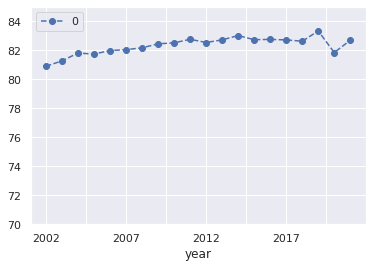

In [155]:
swe_mort_LE.unstack().plot(y=0,style='o--')
plt.ylim([70,85])

In [156]:
df = pd.DataFrame({'cat' : ['A','B','A','B','A','B','A','B','C','C'],
                   'foo': range(10),
                  'bar' : range(10) })

df.apply(lambda row : row['foo'] + row['bar'],axis=1)

0     0
1     2
2     4
3     6
4     8
5    10
6    12
7    14
8    16
9    18
dtype: int64

In [157]:
def get_swe_gender_data(url,query):
    r = requests.post(url,json=query)
    
    if r.status_code != 200 :
        print (r.status_code)
    
    data = pd.DataFrame.from_dict(r.json()['data'])
    data[['area','age','gender','year']] = data['key'].to_list()
    data['count'] = data['values'].apply(lambda x : x[0])
    data['age'] = data['age'].apply(lambda x : x.replace('+','')).astype(int)
    data.drop(['values','key','area'],axis=1,inplace=True)
    data.set_index('year',inplace=True)
    data['count'] = data['count'].astype(int)
    data = data.groupby(['year','age','gender']).sum()
    
    return data
    
swe_gender_pop = get_swe_gender_data(pop_url,pop_query)
swe_gender_dead = get_swe_gender_data(dead_url,dead_query)

swe_gender_mort = (swe_gender_dead / swe_gender_pop).dropna()
swe_gender_mort

count
year age gender          
2002 0   1       0.004073
         2       0.003516
     1   1       0.000336
         2       0.000178
     2   1       0.000380
...                   ...
2021 98  2       0.295571
     99  1       0.458228
         2       0.352941
     100 1       0.507277
         2       0.404299

[4040 rows x 1 columns]

In [158]:
idx = pd.IndexSlice
swe_male_mort = swe_gender_mort.loc[idx[:,:,'1'],:].droplevel(2)
swe_femal_mort = swe_gender_mort.loc[idx[:,:,'2'],:].droplevel(2)

<AxesSubplot:xlabel='age'>

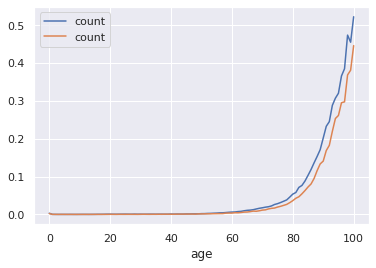

In [159]:
ax = swe_male_mort.loc['2020'].plot()
swe_female_mort.loc['2020'].plot(ax=ax)

In [160]:
swe_gender_mort_rel_diff = swe_male_mort / swe_female_mort
swe_gender_mort_rel_diff

count
year age          
2002 0    1.158335
     1    1.890243
     2    2.425224
     3    0.955093
     4    2.194058
...            ...
2021 96   1.232514
     97   1.440264
     98   1.306824
     99   1.298312
     100  1.254705

[2020 rows x 1 columns]

In [161]:
swe_gender_mort_abs_diff = swe_male_mort - swe_female_mort
swe_gender_mort_abs_diff

count
year age          
2002 0    0.000557
     1    0.000158
     2    0.000223
     3   -0.000005
     4    0.000081
...            ...
2021 96   0.061777
     97   0.117358
     98   0.090688
     99   0.105287
     100  0.102977

[2020 rows x 1 columns]

<AxesSubplot:xlabel='age'>

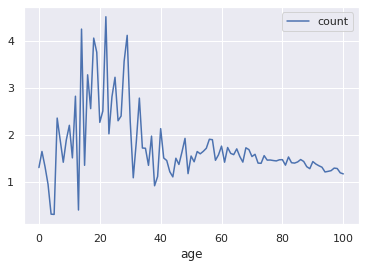

In [162]:
swe_gender_rel_diff.loc['2020'].plot()

<AxesSubplot:xlabel='age'>

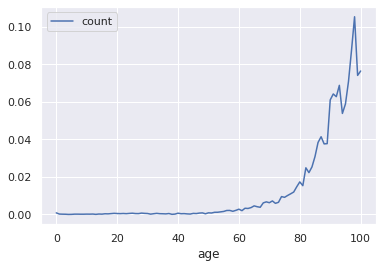

In [163]:
swe_gender_abs_diff.loc['2020'].plot()

<AxesSubplot:>

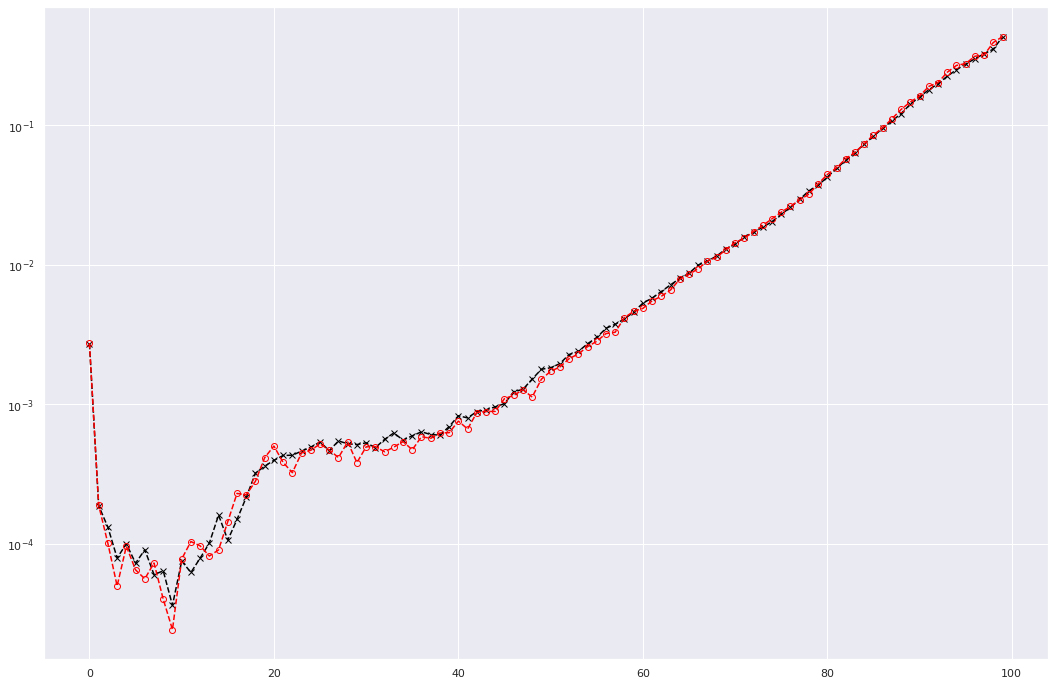

In [164]:
swe_age_99_mort_baseline = swe_age_99_mort.loc['2015' : '2018'].mean()

ax = swe_age_99_mort_baseline.plot(figsize=(18,12),ls = '--',color='black',marker='x',logy=True)
swe_age_99_mort.loc['2020'].plot(ax=ax,ls='dashed',marker='o',markerfacecolor='none',color='red',logy=True)

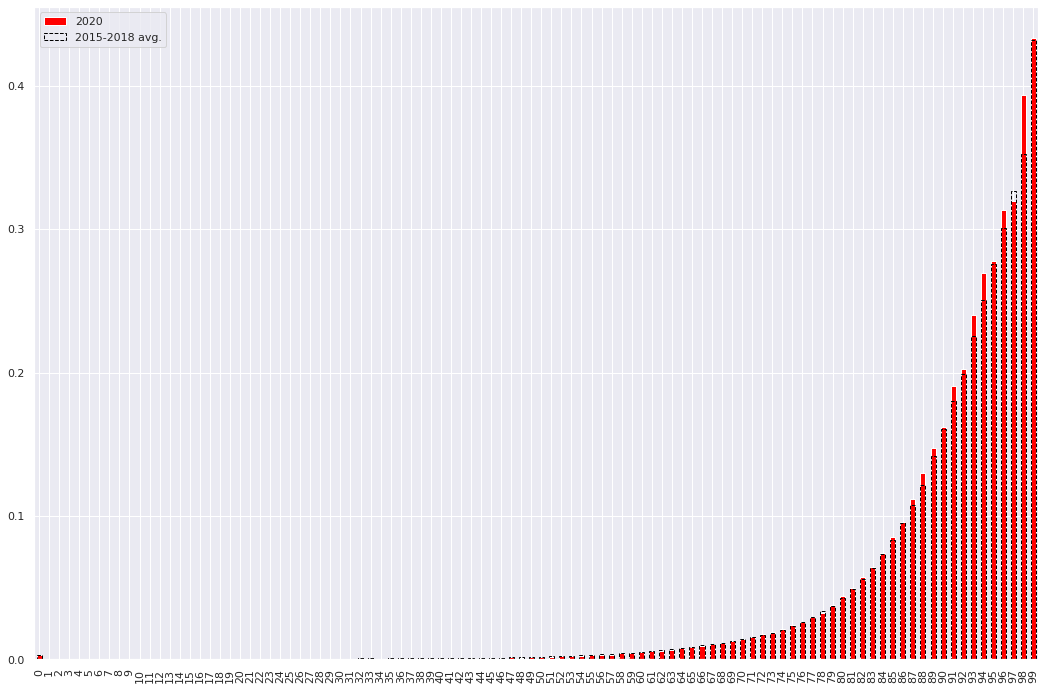

In [165]:
ax = swe_age_99_mort.loc['2020'].plot(kind='bar',color='red',figsize=(18,12),label='2020')
swe_age_99_mort_baseline.plot(kind='bar',facecolor='none',figsize=(18,12),edgecolor='black',ls='dashed',
                             label='2015-2018 avg.')

plt.legend(loc='upper left')